<a href="https://colab.research.google.com/github/troncosofranco/ML-Notebooks/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem statement

In the domain of finance and banking, accurate and effective risk prediction for credit customers is an imperative task. It is crucial for banks and financial institutions to understand the likelihood of their customers defaulting on a loan, to not only protect the institution's financial health but also to comply with regulatory norms.



#Solution approach

The development of data analysis and predictive model based involves the following items:

a)	Data analysis.

b)	Predictive model: Deep learning and machine learning algorithms.


#Stakeholders and benefits

1. **Banks and Financial Institutions**: These entities benefit from more precise risk assessments, which allows for better decision-making in granting loans and setting interest rates. By accurately predicting credit risk, they can minimize potential losses due to defaults and optimize their loan portfolio for better profitability.

2. **Customers/Borrowers**: Accurate credit risk prediction models contribute to fair and transparent lending practices. 

3. **Investors**: Investors in banks or financial institutions will benefit from a better-managed credit portfolio, leading to healthier financial statements, thereby reducing investment risk.

4. **Fintech Companies**: Companies that develop and provide credit risk prediction models can benefit from the validation and potential success of their technologies in the market.

#Data

The [Germat Credit](https://www.kaggle.com/datasets/uciml/german-credit) data was obtained from Kaggle.

###Data Attributes
The original dataset contains 1000 entries with 20 categorial/symbolic attributes, where each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. 

The features anda data type are:
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others).

#1. Import modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

#metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

#2. Load Data

In [2]:
df = pd.read_csv("german_credit_data.csv",index_col=0)

#Rename columns
df = df.rename(columns={"Credit amount": "Credit_amount"})

#3. Data overview

In [3]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


Saving accounts and Checking account features have missing values.

In [4]:
df.describe()

Age          Job  Credit_amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000

###Summary:
1- Dataset have have four numeric and four categorical features.
- The average age of people is 35.54. Youngest customer is 19 years old, and the oldest is 75 years old.
- The average credit amount borrowed is 3271. The lowest credit amount borrowed is 250, and the highest is 18424.
- The average credit duration is 20.9.
- The majority of customers belong to the skill class..

In [5]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

The total number of records is 1000. Checking and Saving accounts have 394 (39.4%) and 183 (18.3%), respectively. The missing values for saving account are filled using MCT, being a better alternativa than drop missing values considering the high proportion of them.

#4. Data Quality
##4.1. Saving Accounts Attribute

In [6]:
# Mode of saving accounts feature
print('The mode of Saving Accounts is ',df['Saving accounts'].mode())

# Fill missing values with mode
df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace=True)

# Check missing values
df['Saving accounts'].isnull().sum()

The mode of Saving Accounts is  0    little
Name: Saving accounts, dtype: object


0

##4.2 Checking account Attribute

In [7]:
df['Checking account'].isnull().sum()

394

In [8]:
df['Checking account'].fillna(df['Checking account'].mode()[0], inplace=True)
df['Checking account'].isnull().sum()

0

In [9]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#5. Univariate Analysis

Univariate analysis is the simplest form of statistical analysis, the major purpose of which is to describe. It involves examining and analyzing only one variable or feature at a time.

##5.1. Categorical Attributes
###5.1.1. Risk Management


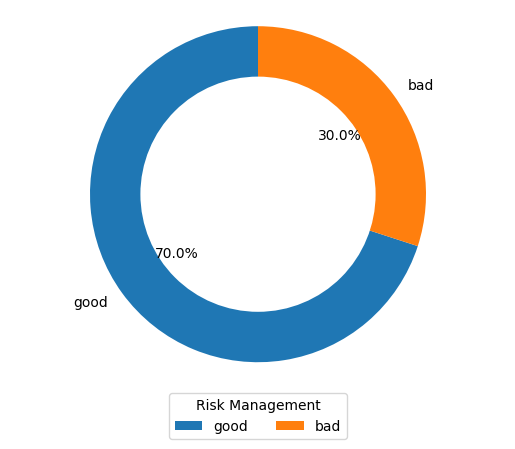

In [10]:
# create data
lab = df["Risk"].value_counts().keys().tolist()
val = df["Risk"].value_counts().values.tolist()
 
# Create the chart
fig, ax = plt.subplots()
ax.pie(val, labels=lab, autopct='%1.1f%%', startangle=90)

# Draw a white circle at the center to create the donut shape
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Set aspect ratio to be equal so that the pie is drawn as a circle
ax.axis('equal')

# Add a legend with percentage values
ax.legend(title="Risk Management", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=2)

# Display the chart
plt.show()


Risk management is imbalance 70-30. The use of stratified k fold cross validation that is specifically  recommended for imbalanced classes.

In [11]:
# Funtion for categorical features visualization

def categorical_plots(var, data):
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(wspace=0.3)
    
    plt.style.use('fivethirtyeight')
        
    #Bar plot     
        
    plt.subplot(1,2,1)
    sns.countplot(x=var, data= data)
    plt.xticks(rotation = 45, horizontalalignment='right')
    plt.xlabel(var.name + ' Distribution')
    

    #Pie Chart
    
    labels =var.value_counts().index  
    a=[0.1]
    for i in range ((len(var.unique()))-1):
        a.append(0)

    explode1= tuple(a)
    
    ax1 = plt.subplot(1,2,2)
    ax1.pie(var.value_counts(), labels=labels,autopct='%1.1f%%', shadow=True,explode= explode1 )
    ax1.axis('equal')
    plt.xlabel(var.name + ' Distribution')
    plt.legend()
        
    show=plt.show()
    
    return(show)

###5.1.2. Age Attribute

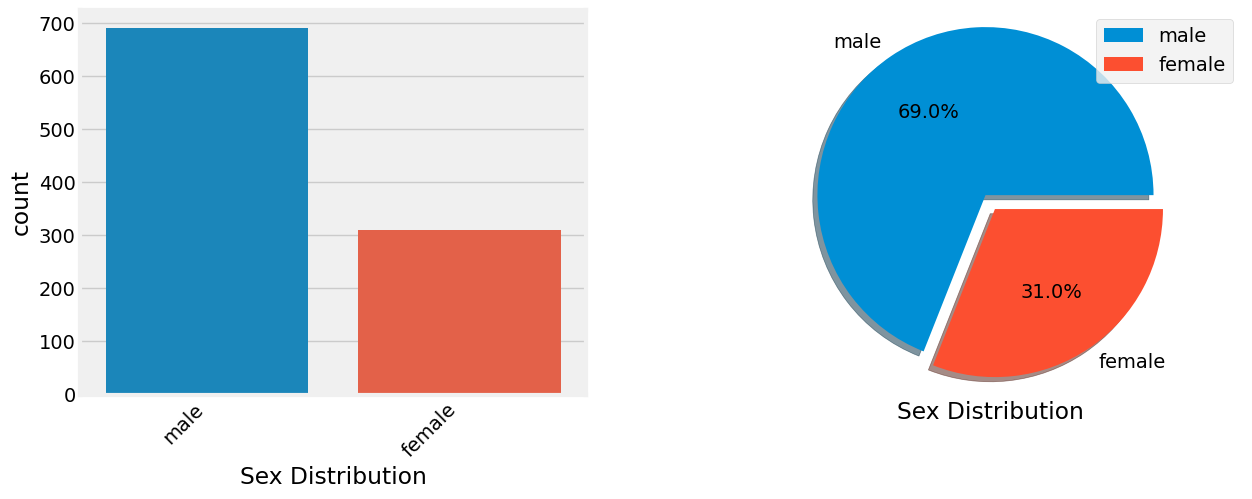

In [12]:
categorical_plots(df.Sex, df)

###5.1.3. Job Attribute

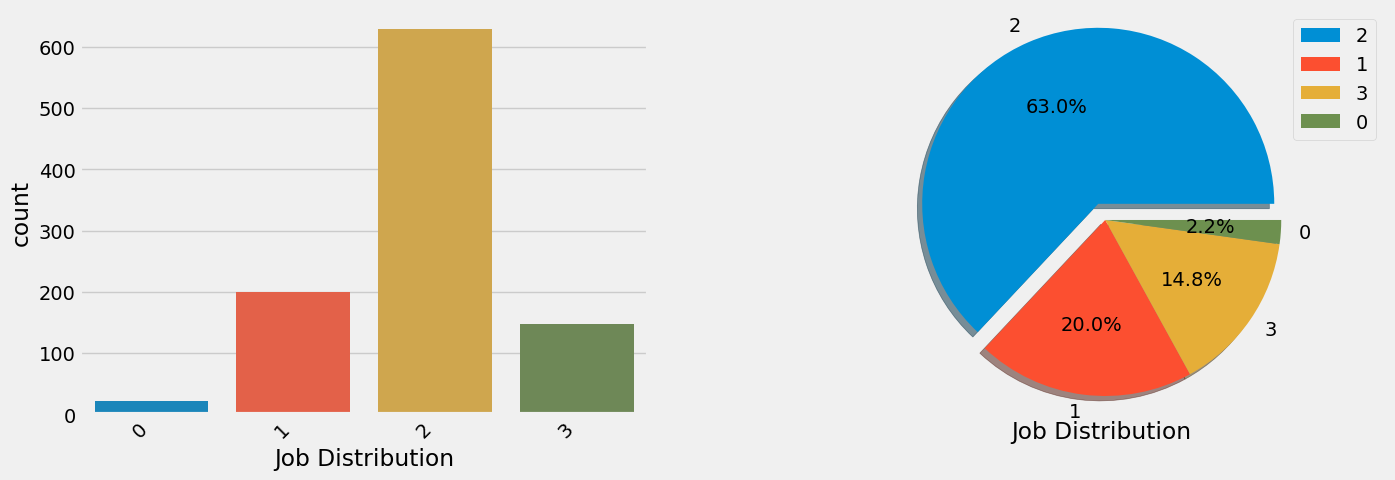

In [13]:
categorical_plots(df.Job,df)

5.1.4. Housing Attribute

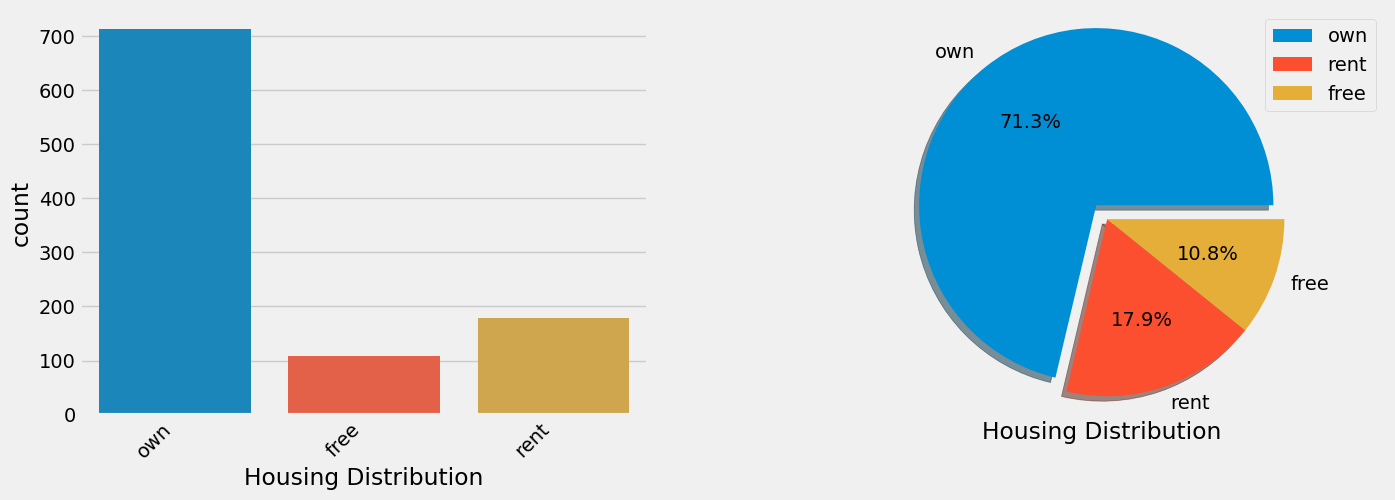

In [14]:
categorical_plots(df.Housing,df)

5.1.5. Saving Accounts Attribute

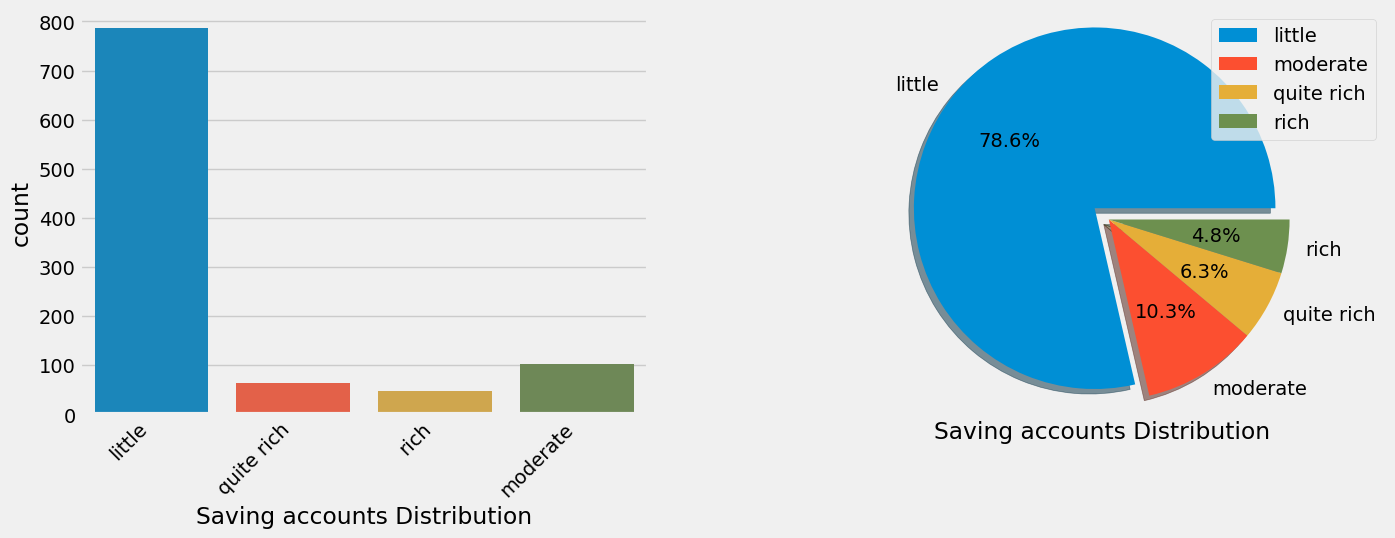

In [15]:
categorical_plots(df['Saving accounts'],df)

###5.1.6. Checking Account Attribute

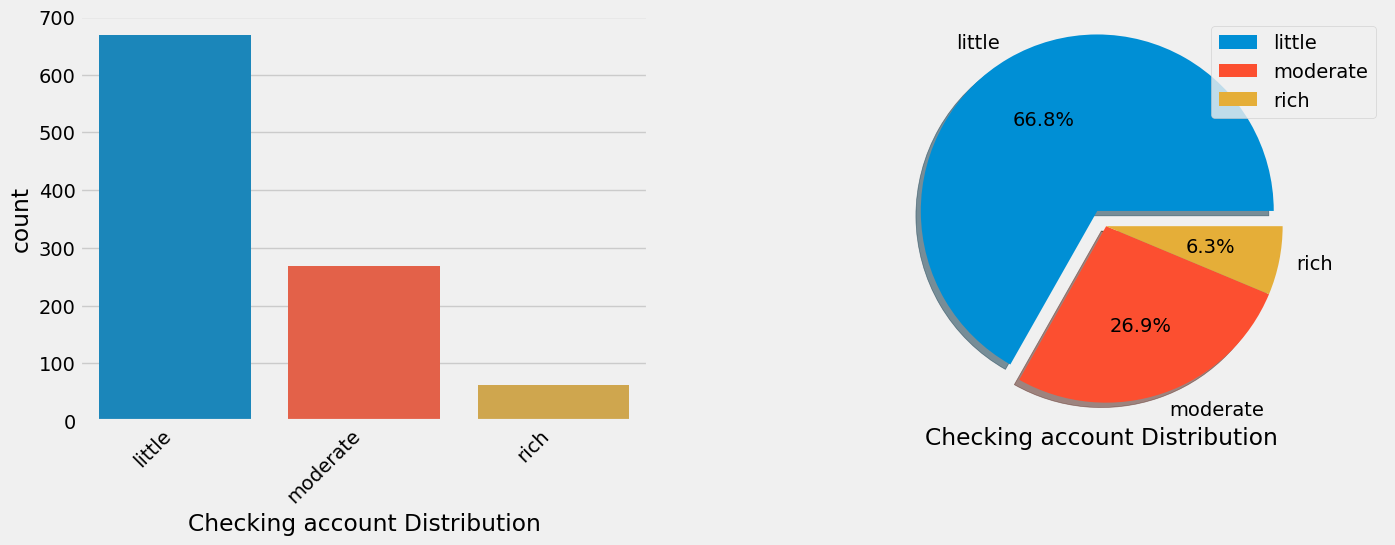

In [16]:
categorical_plots(df['Checking account'],df)

###5.1.7. Purpose Attribute

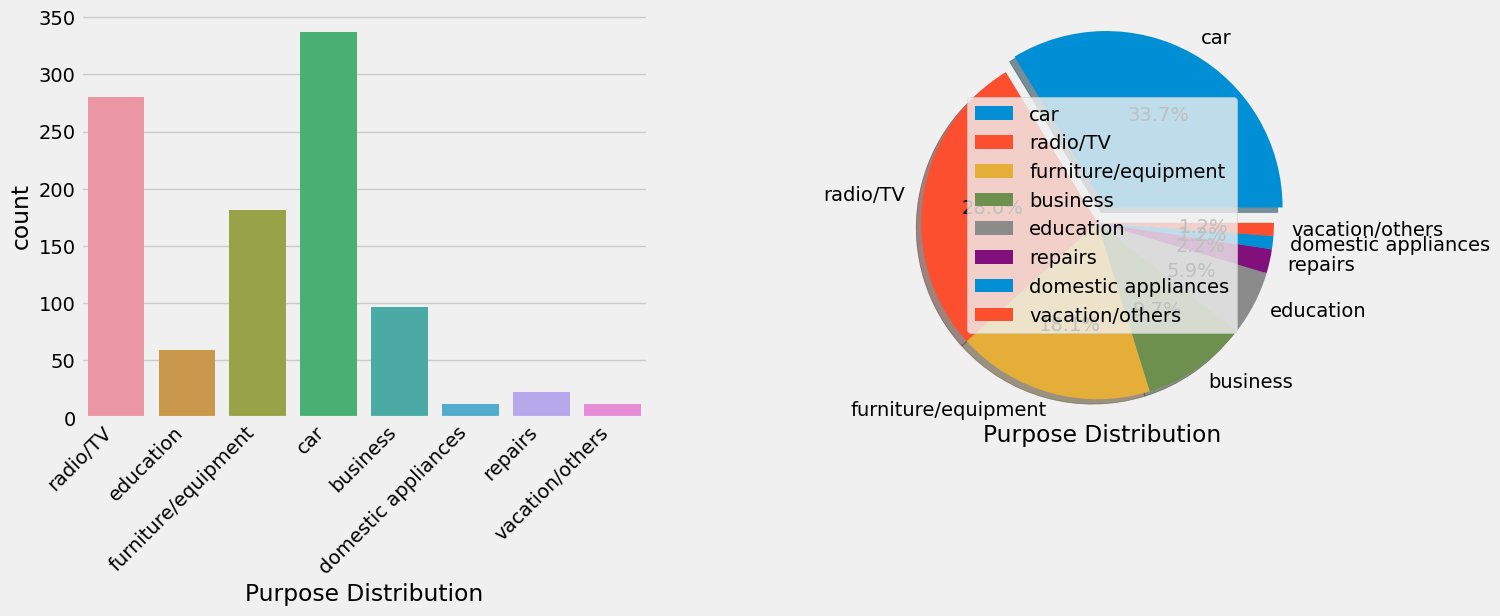

In [17]:
categorical_plots(df.Purpose,df)

##5.2. Numerical Attributes
###5.2.1. Age Attribute

In [18]:
def numerical_plots(var):
    fig = plt.figure(figsize=(15,4))
    fig.subplots_adjust(wspace=0.3)
    
    # Histogram with KDE plot          
    plt.subplot(1,2,1)
    sns.distplot(var, color='b')
    plt.xlabel(var.name + ' Distribution')
    
    # Violin plot
    plt.subplot(1,2,2)
    sns.violinplot(y=var)
    plt.xlabel(var.name + ' Distribution')
    
    show=plt.show()
    
    return(show)

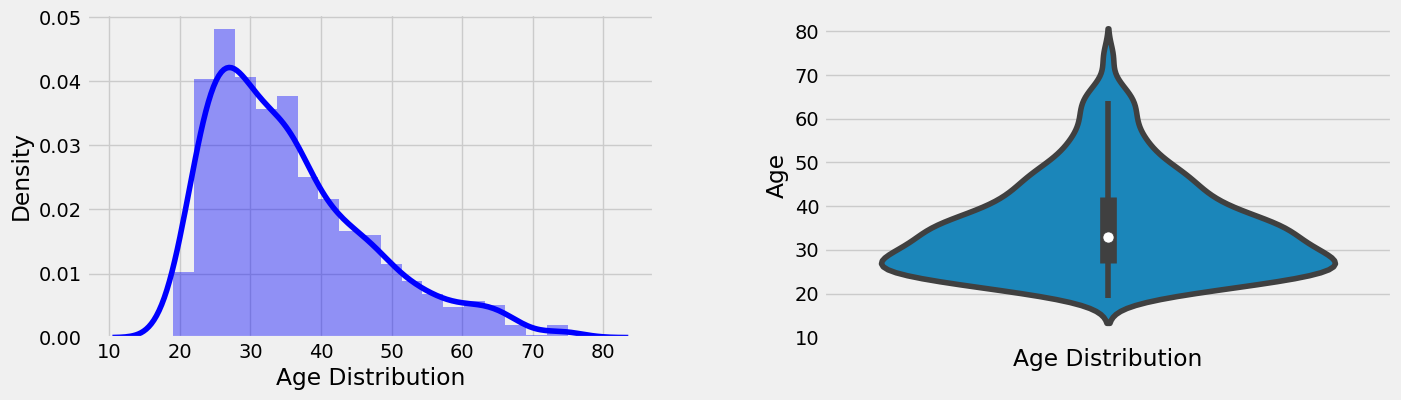

In [19]:
numerical_plots(df.Age)

###5.2.2.Credit Amount Attribute

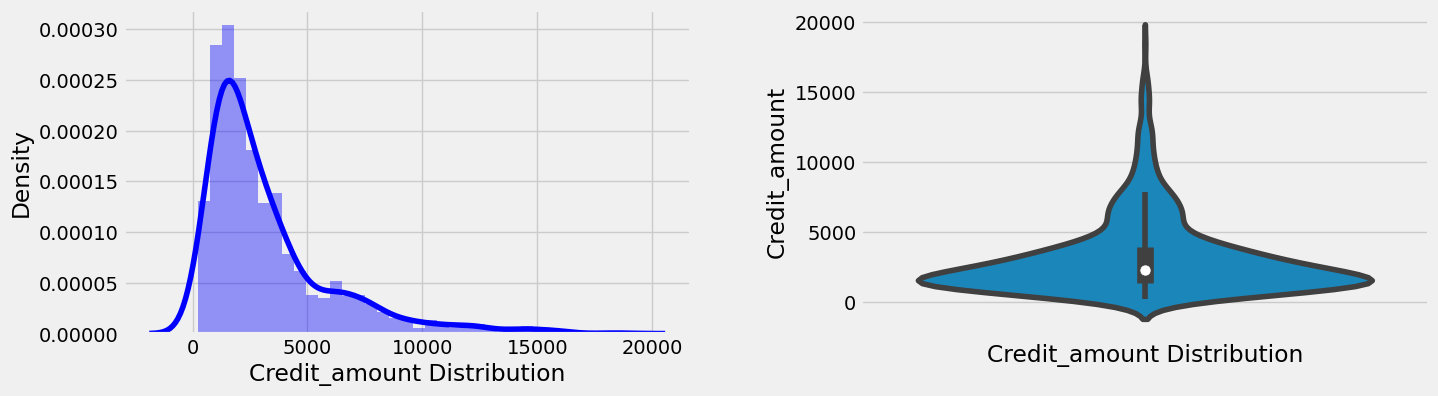

In [20]:
numerical_plots(df.Credit_amount)

###5.2.3.Duration

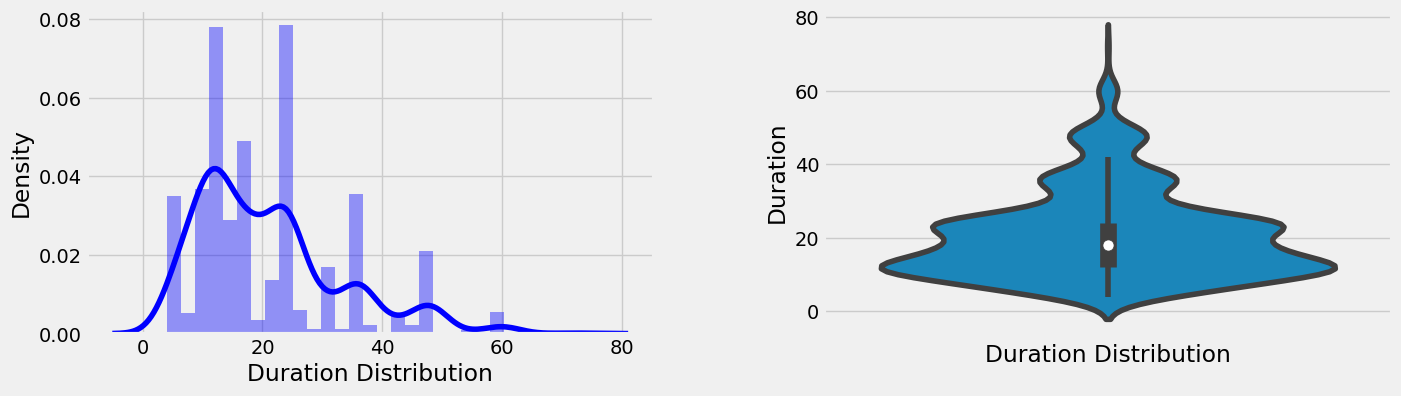

In [21]:
numerical_plots(df.Duration)

Summary univariate analysis:
1.  Risk attribute is imbalanced (70:30)
2.  People aged between 20 to 40 tend to apply for credits more as compared to older age groups. 
3. Males apply more than female for credit, 69% vs 31%. 
4. The 83% of people who applied for loan is skilled or highly skilled.
5. People who have their own houses are the main customers type (71.3%).
6. Customers with little saving account applied for a loan (66.8%).
7. Most of loan applications are to buy car (33.7%), followed to buy radio/TV (28.0%).
8. Most of loan applications had a credit amount lower than 5000, with an average of 3271.26
9. Most of loan applications had a duration between 10-25 months.
10. Most of customers have a little checking account (66.8%)


#6. Bivariate Analysis

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

##6.1. Categorical Attributes

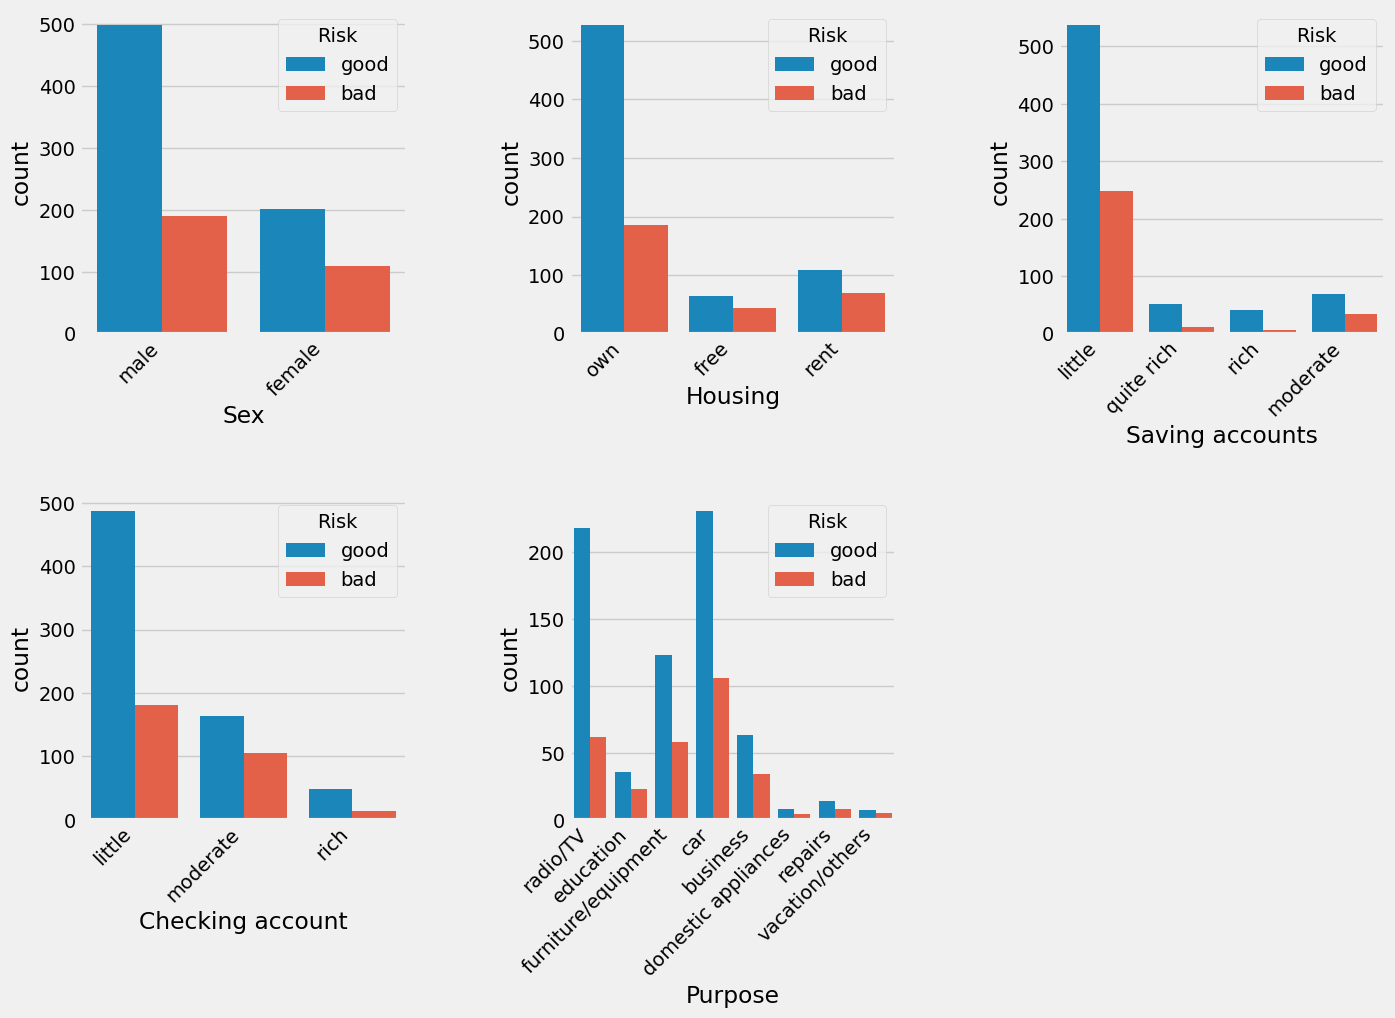

In [22]:
#Bar plot (target label= Risk)
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

j=1
for i in df.columns:
    if df[i].dtype =='O' and i!='Risk': #'O': Categorical Values
        plt.subplot(2,3,j)
        sns.countplot(x=df[i], hue=df.Risk, data=df)
        plt.xticks(rotation = 45, horizontalalignment='right')
        j+=1
plt.show()

##6.2. Numerical Attributes

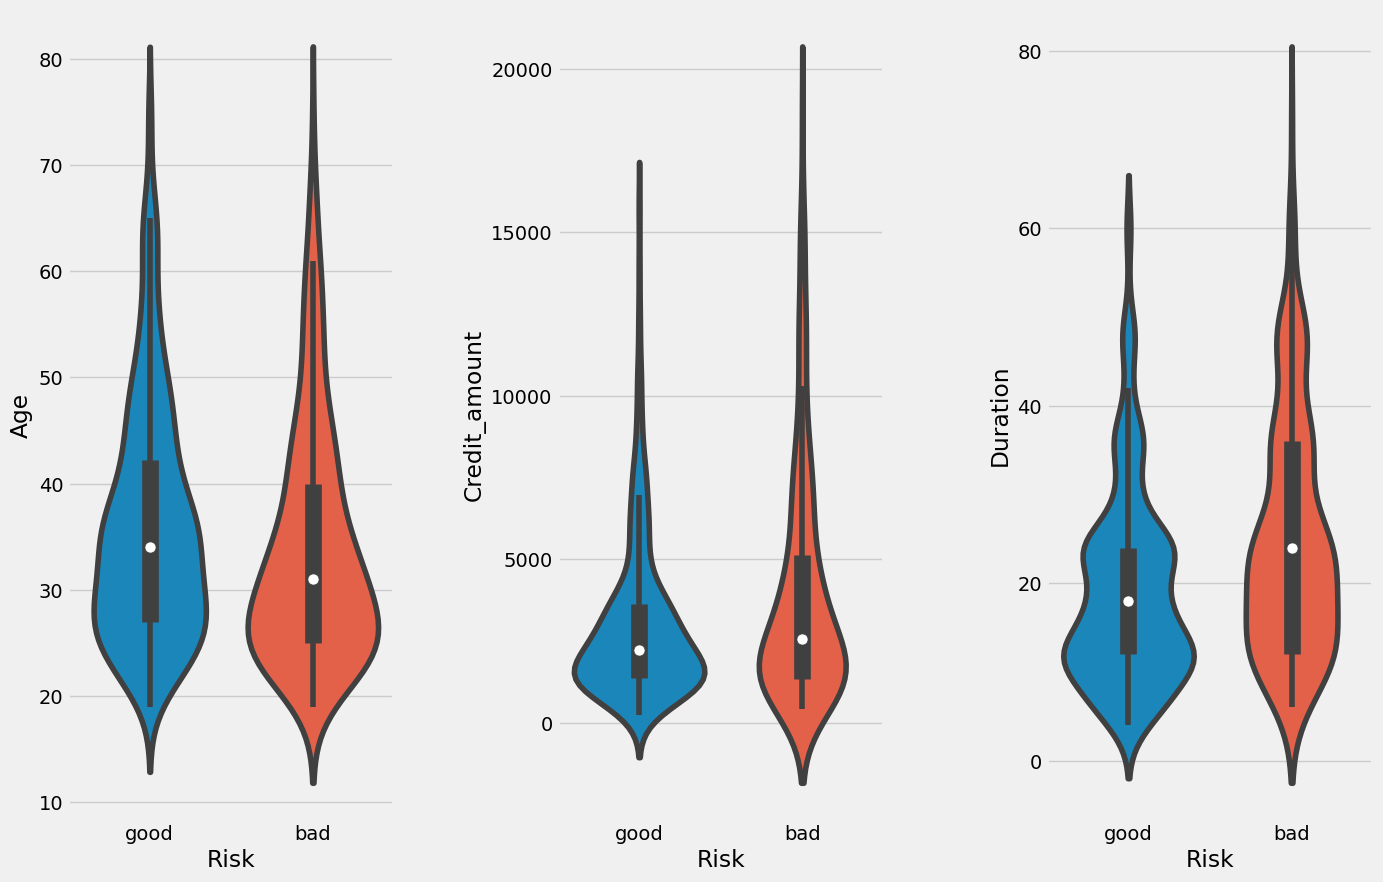

In [23]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

j=1
for i in df.columns:
    if df[i].dtype !='O' and i!='Job':
        plt.subplot(1,3,j)
        sns.violinplot(y=df[i], x=df.Risk)
        j+=1
plt.show()

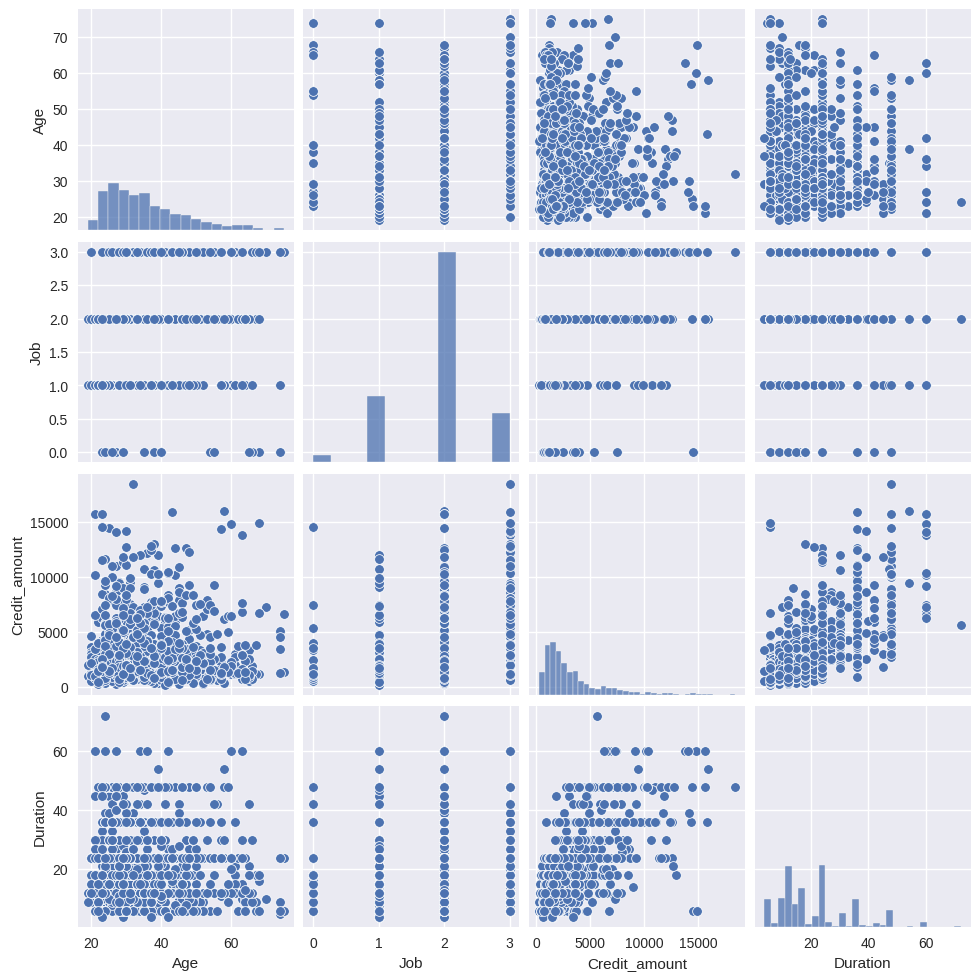

In [24]:
#Pairplot
plt.style.use('seaborn')
sns.pairplot(df)

Summary bivariate analysis:
1. The following factors of the customers favors a good loan:own house, little saving accounts, ccredit to buy radio/TV, and little checking acount.
2. The conditions of credit application for an unsatisfactory loan are: High credit amount borrowed (>11000) and high duration.
3. The probability that a credit application is a bad loan increases for amounts greater than 3000.
4. A credit application with a duration greater than 25 months shows higher probability of being a Bad Risk.
5. Customers older than 45 years old request fewer credits. Old aged customers tend to apply for loan applications with shorter durations

#7. Correlation of variables

This section analyzes the correlation between the varaibles to identify those attributes than favors good loans. "0" will stand for "bad risk" loans and "1" will stand for "good risk" loans.

In [25]:
df.Risk = np.where(df.Risk =='good',1,0)

<Axes: >

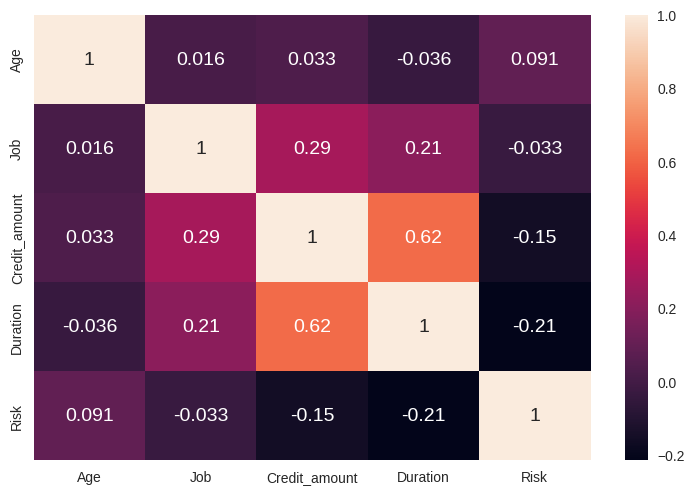

In [26]:
#heatmap using seaborn
corr = df.corr()
sns.heatmap(corr, annot=True)

Observattions:
1. Credit amount and Duration attributes are strongle correlated (0.62).
2. Credit amount and Duration attributes show negative correlation coefficient, being -0.15 and -0.21, respectively (Larger credit amount and duration implies higher loan risk). 


#8. Chi Square Test

Chi Square test is applied to categorical attributes.

In [27]:
import scipy.stats as s

# Function to evaluate Chi Square
def chi2(data,target,alpha):
    
    for i in df.columns:
    
        if df[i].dtype == 'O' and i != target:
            col = i
            ov = pd.crosstab(data[col], data[target])
            
            plt.style.use('fivethirtyeight')
            ov.plot(kind='bar', figsize=(5,5), stacked=True)
            plt.xlabel(i.title())
                 
            chi = s.chi2_contingency(ov)
            chi2_s = chi[0]
            p_value = chi[1]
            dof = chi[2]
            critical_value = s.chi2.ppf(q=1-alpha, df=dof)
            
            print('\n\033[1m\033[4m', col.upper(),':\033[0m \n')
            print('Significance Level = ', alpha)
            print('Degree of Freedom = ', dof)
            print('chi2 = ', chi2_s)
            print('Critical Value = ',critical_value)
            print('p-value = ', p_value)

            if chi2_s >=critical_value or p_value <= alpha :
                print('\nWe reject the null hypotheses, there is a significant relationship between the two variables \n')
            else:
                print('\nThere is no signiticant relationship between the two variables and the null hypotheses is retained \n')
            
            plt.show()


 SEX : 

Significance Level =  0.05
Degree of Freedom =  1
chi2 =  5.348516218081436
Critical Value =  3.841458820694124
p-value =  0.020739913068713305

We reject the null hypotheses, there is a significant relationship between the two variables 



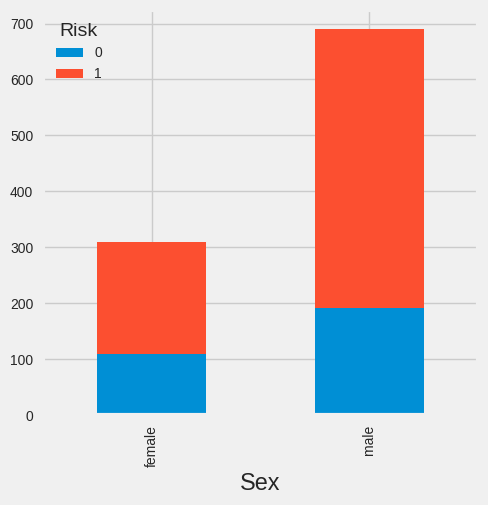


 HOUSING : 

Significance Level =  0.05
Degree of Freedom =  2
chi2 =  18.19984158256362
Critical Value =  5.991464547107979
p-value =  0.00011167465374597684

We reject the null hypotheses, there is a significant relationship between the two variables 



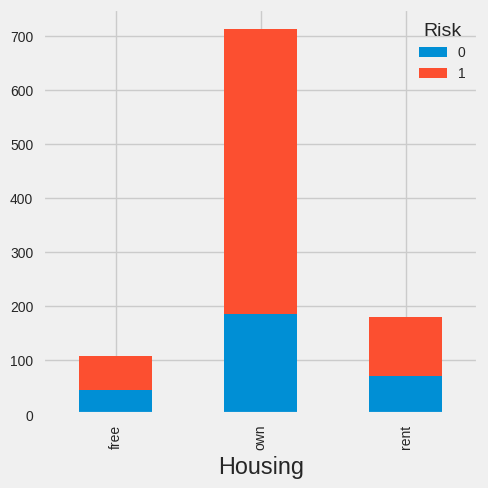


 SAVING ACCOUNTS : 

Significance Level =  0.05
Degree of Freedom =  3
chi2 =  13.217215622960401
Critical Value =  7.814727903251179
p-value =  0.004189653304672609

We reject the null hypotheses, there is a significant relationship between the two variables 



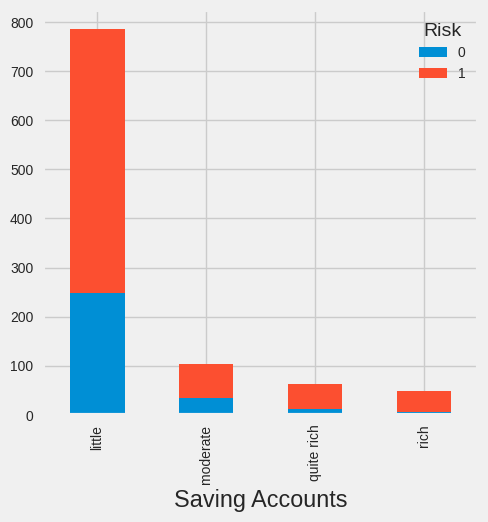


 CHECKING ACCOUNT : 

Significance Level =  0.05
Degree of Freedom =  2
chi2 =  14.950735220418903
Critical Value =  5.991464547107979
p-value =  0.0005668773394330006

We reject the null hypotheses, there is a significant relationship between the two variables 



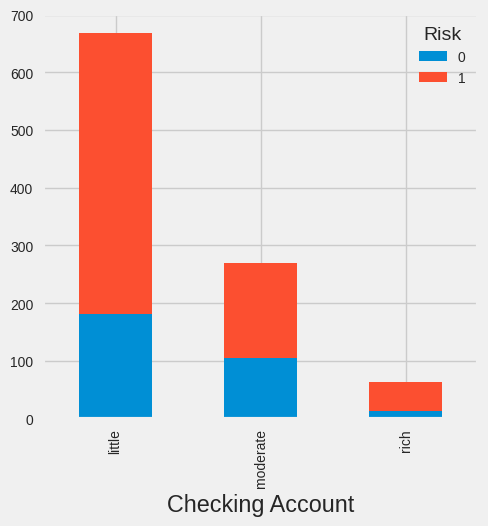


 PURPOSE : 

Significance Level =  0.05
Degree of Freedom =  7
chi2 =  13.642086296939734
Critical Value =  14.067140449340169
p-value =  0.05792591119293633

There is no signiticant relationship between the two variables and the null hypotheses is retained 



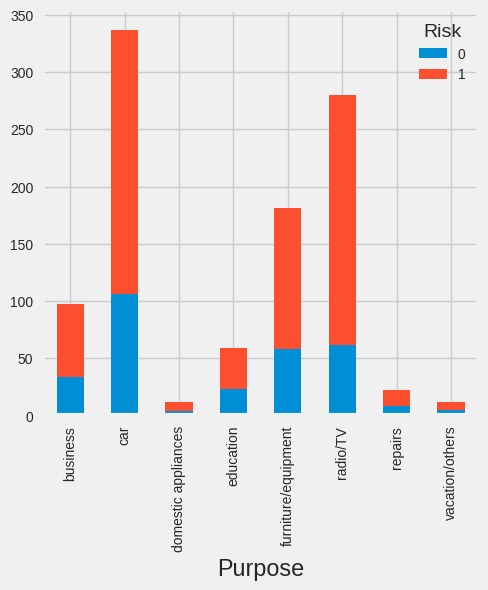

In [28]:
chi2(df, 'Risk', 0.05) #p-value < 0.05

Observations:
All categorical attributes have a significant relationship with the target variable (Risk) except 'Purpose' attribute. In addition, saving account has the highest affect on the Risk (lowest p-value).

In [29]:
#Drop checking account
df.drop(columns = ['Purpose'], inplace=True)

In [30]:
df.head(2)

Age     Sex  Job Housing Saving accounts Checking account  Credit_amount  \
0   67    male    2     own          little           little           1169   
1   22  female    2     own          little         moderate           5951   

   Duration  Risk  
0         6     1  
1        48     0

#9. Outlier Handling

As shown previously, age, credit amount and Duration attributes have outliers and were positivey skewed. In this case, logarithmic transformation is applied to reduce the positive skweness and remove the outliers.

In [31]:
outliers = np.log(df[['Age', 'Duration', 'Credit_amount']])

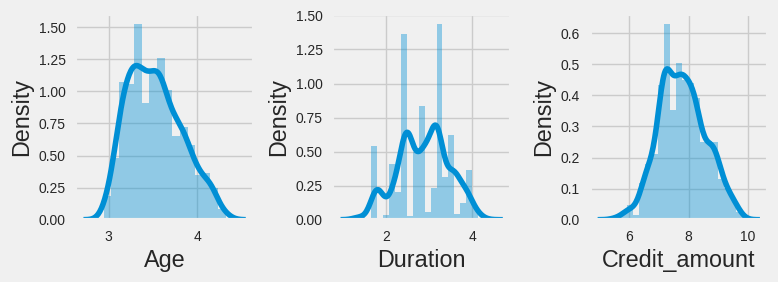

In [32]:
# Plot the attribute values in logarithmic scale

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,3))
sns.distplot(outliers.Age, ax=ax1)
sns.distplot(outliers.Duration, ax=ax2)
sns.distplot(outliers.Credit_amount, ax=ax3)

plt.tight_layout()

#10. Feauture Encoding and Data Normalization
##10.1. Manual Encoding 

In [33]:
df.Sex = np.where(df.Sex == 'male',1,0)

In [34]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit_amount', 'Duration', 'Risk'],
      dtype='object')

#10.2. One Hot Encoding

In [35]:
df.Dummies_Housing = pd.get_dummies(df.Housing)
df.Dummies_Saving = pd.get_dummies(df['Saving accounts'])
df.Dummies_Checking = pd.get_dummies(df['Checking account'])

In [36]:
# df.Dummies_Housing.head(2)
# df.Dummies_Saving.head(2)
# df.Dummies_Housing.head(2)

In [37]:
df.head()

Age  Sex  Job Housing Saving accounts Checking account  Credit_amount  \
0   67    1    2     own          little           little           1169   
1   22    0    2     own          little         moderate           5951   
2   49    1    1     own          little           little           2096   
3   45    1    2    free          little           little           7882   
4   53    1    2    free          little           little           4870   

   Duration  Risk  
0         6     1  
1        48     0  
2        12     1  
3        42     1  
4        24     0

In [38]:
# Concatenate Dummies columns
df = pd.concat([df, df.Dummies_Housing, df.Dummies_Saving, df.Dummies_Checking], axis = 1)

#Drop columns
df.drop(columns=['Housing', 'Saving accounts', 'Checking account'], inplace=True)
df.head()

Age  Sex  Job  Credit_amount  Duration  Risk  free  own  rent  little  \
0   67    1    2           1169         6     1     0    1     0       1   
1   22    0    2           5951        48     0     0    1     0       1   
2   49    1    1           2096        12     1     0    1     0       1   
3   45    1    2           7882        42     1     1    0     0       1   
4   53    1    2           4870        24     0     1    0     0       1   

   moderate  quite rich  rich  little  moderate  rich  
0         0           0     0       1         0     0  
1         0           0     0       0         1     0  
2         0           0     0       1         0     0  
3         0           0     0       1         0     0  
4         0           0     0       1         0     0

##10.3. Data Normalization

In [39]:
# split the data into arrays
y = df.Risk
X = df.drop(columns = ['Risk'])

X.head()

Age  Sex  Job  Credit_amount  Duration  free  own  rent  little  moderate  \
0   67    1    2           1169         6     0    1     0       1         0   
1   22    0    2           5951        48     0    1     0       1         0   
2   49    1    1           2096        12     0    1     0       1         0   
3   45    1    2           7882        42     1    0     0       1         0   
4   53    1    2           4870        24     1    0     0       1         0   

   quite rich  rich  little  moderate  rich  
0           0     0       1         0     0  
1           0     0       0         1     0  
2           0     0       1         0     0  
3           0     0       1         0     0  
4           0     0       1         0     0

In [40]:
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler()

for i in X.columns:
  df[i] = zscore.fit_transform(df[[i]])

In [41]:
# The 'records' orientation means that each row in the DataFrame will become a dictionary in the list.
X = X.to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

X = vec.fit_transform(X).toarray()

In [42]:
y = np.asarray(y)

#11. Machine Learning

#11.1. Stratified Cross Validation

Stratified Cross Validation is applied to lead with class imbalance. Stratifed cross validation splits data having equal portions of the target class in every split.

In [43]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None) #K-Folds: 5

for train_index, val_index in skf.split(X,y): 
    
    # Split into train and test dataset with Stratified K-Fold
    xtrain, xtest = X[train_index], X[val_index] 
    ytrain, ytest = y[train_index], y[val_index]

##11.2 Define functions for training

In [44]:
# Metrics
from sklearn.metrics import roc_auc_score,roc_curve, classification_report, confusion_matrix
import plotly.tools as tls

def evaluation(algorithm):
    #Classification Report
    print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest,algorithm ))

    #Accuracy
    print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, algorithm))

    #conf_matrix
    conf_matrix = confusion_matrix(ytest,algorithm)

    #roc_auc_score
    model_roc_auc = round(roc_auc_score(ytest, algorithm),3) 
    print ("\033[1mArea under curve : \033[0m",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

    # roc curve plot
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    #confusion matrix plot
    trace2 = go.Heatmap(z = conf_matrix ,
                        x = ["Bad Risk ","Good Risk"],
                        y = ["Bad Risk","Good Risk"],
                        colorscale = "Viridis",name = "matrix" )
    #subplots
    fig = tls.make_subplots(rows=1, cols=2, horizontal_spacing = 0.40,subplot_titles=('ROC Curve','Confusion Matrix'))

    fig.append_trace(trace1,1,1)
    fig.append_trace(trace3,1,1)
    fig.append_trace(trace2,1,2)


    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 400,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         xaxis = dict(title = "false positive rate",
                                 gridcolor = 'rgb(255, 255, 255)',
                                 domain=[0, 0.6],
                                 ticklen=5,gridwidth=2),
                        yaxis = dict(title = "true positive rate",
                                  gridcolor = 'rgb(255, 255, 255)',
                                  zerolinewidth=1),
                        margin = dict(b = 20))

    py.iplot(fig)

In [45]:
#Defining a function using Yellow brick library to be used for evaluation

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC
from yellowbrick.features import FeatureImportances



def visualize(model):

    
    fig, axes = plt.subplots(1, 3,figsize=(15,5))
    fig.subplots_adjust(wspace=0.7)
    
    visualgrid = [
        #FeatureImportances(model,ax=axes[0][0]),
        ROCAUC(model, ax=axes[1],cmap='RdYlBu'),
        ConfusionMatrix(model,cmap='BuPu', ax=axes[2]),
        ClassificationReport(model, cmap='PuBu',ax=axes[0])
        
    ]

    for viz in visualgrid:
        viz.fit(xtrain, ytrain)
        viz.score(xtest, ytest)
        viz.finalize()

    plt.show()

#11.3. Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Model Training
model_LG =LogisticRegression()
model_LG.fit(xtrain, ytrain)

#Prediction
y_pred_LG = model_LG.predict(xtest)
probabilities = model_LG.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

Logistic Regression Evaluation using Plotly

In [47]:
evaluation(y_pred_LG)


  Classification report : 
               precision    recall  f1-score   support

           0       0.55      0.18      0.27        60
           1       0.73      0.94      0.82       140

    accuracy                           0.71       200
   macro avg       0.64      0.56      0.55       200
weighted avg       0.67      0.71      0.66       200

Accuracy Score   :  0.71
Area under curve :  0.56


Logistic Regression Evaluation using YellowBrick

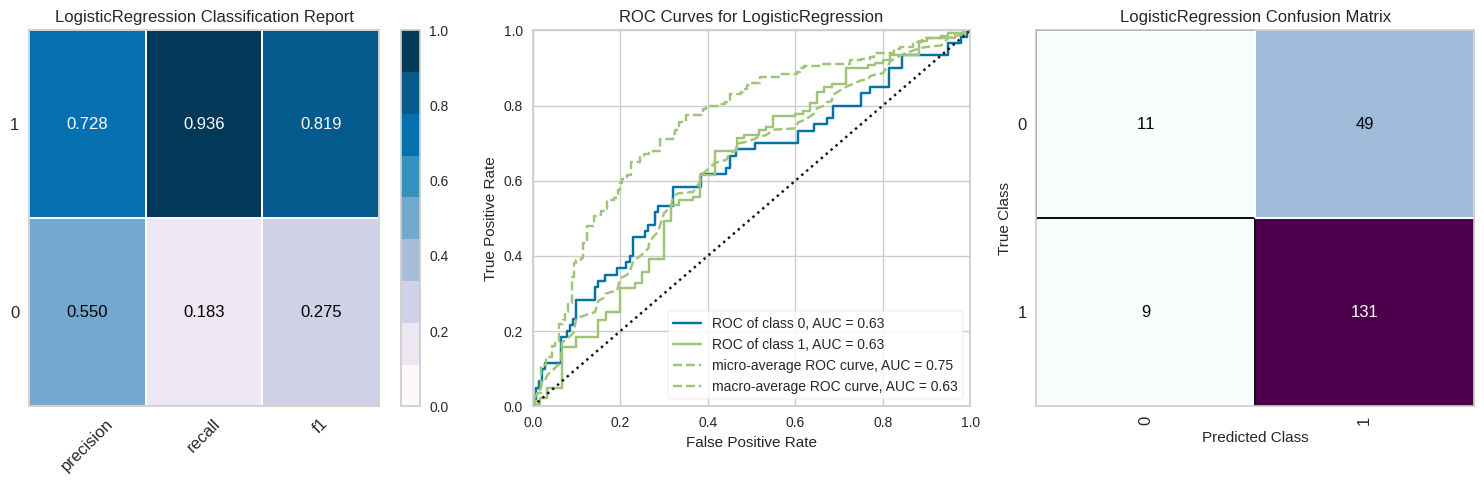

In [48]:
visualize(model_LG)

##11.4. KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

#Model Training
model_KNN =KNeighborsClassifier()
model_KNN.fit(xtrain, ytrain)

#Prediction
y_pred_KNN = model_KNN.predict(xtest)
probabilities = model_KNN.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

KNN Evaluation Using Plotly

In [50]:
evaluation(y_pred_KNN)


  Classification report : 
               precision    recall  f1-score   support

           0       0.38      0.23      0.29        60
           1       0.72      0.84      0.77       140

    accuracy                           0.66       200
   macro avg       0.55      0.53      0.53       200
weighted avg       0.62      0.66      0.63       200

Accuracy Score   :  0.655
Area under curve :  0.535


KNN Evaluation using YellowBrick

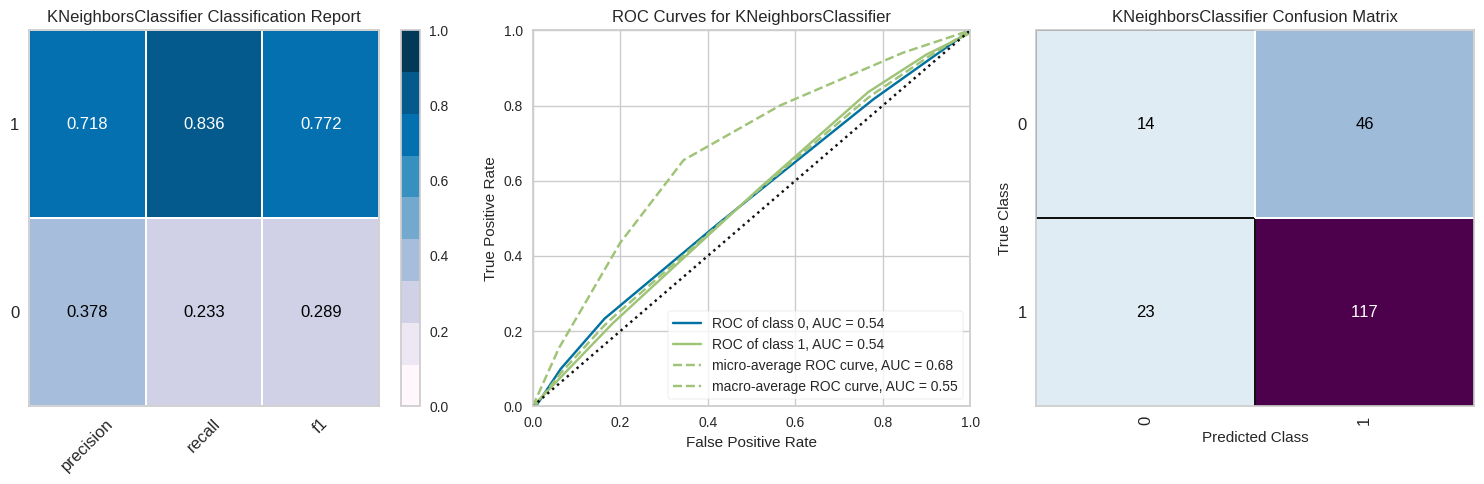

In [51]:
visualize(model_KNN)

#11.5 Naive Bayes Classifier

In [52]:
from sklearn.naive_bayes import GaussianNB

#Model Training
model_nb =GaussianNB()
model_nb.fit(xtrain, ytrain)

#Prediction
y_pred_nb = model_nb.predict(xtest)
probabilities = model_nb.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])


Naive Bayes Evaluation using Plotly.

In [53]:
evaluation(y_pred_nb)


  Classification report : 
               precision    recall  f1-score   support

           0       0.45      0.42      0.43        60
           1       0.76      0.79      0.77       140

    accuracy                           0.68       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.67      0.68      0.67       200

Accuracy Score   :  0.675
Area under curve :  0.601


Naive Bayes Evaluation using YellowBrick.

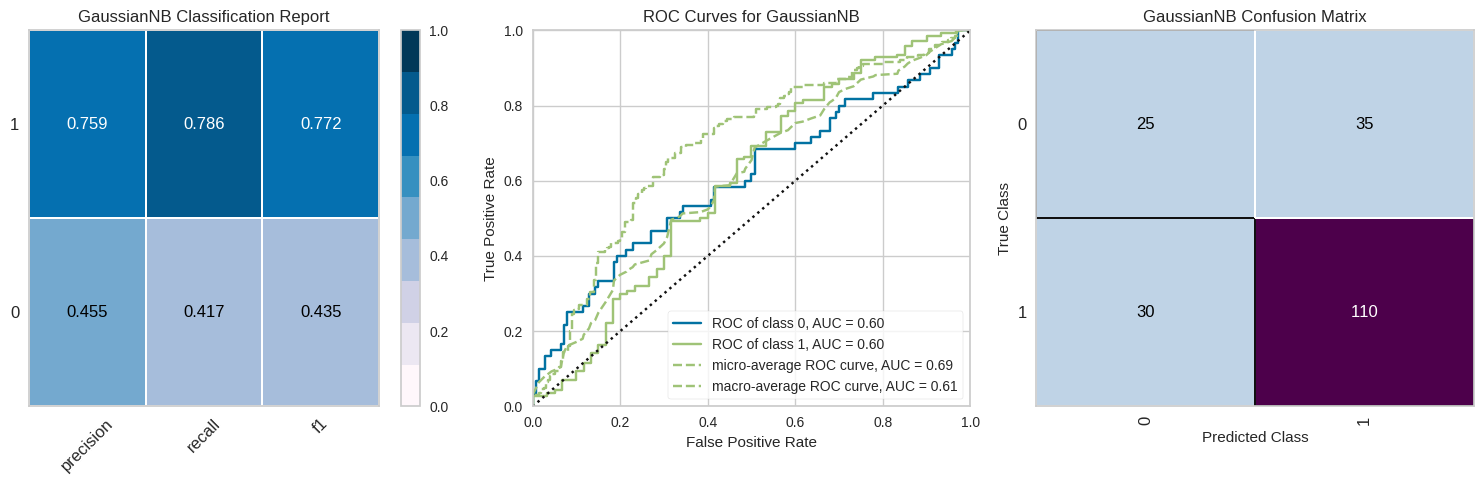

In [54]:
visualize(model_nb)

#11.6. Decision Tree Classifier

In [55]:
from sklearn import tree

# Model Traning
model_DT = tree.DecisionTreeClassifier()
model_DT.fit(xtrain,ytrain)

#Predictions
y_pred_DT = model_DT.predict(xtest)
probabilities = model_DT.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

Decision Tree Evaluation Using Plotly

In [56]:
evaluation(y_pred_DT)


  Classification report : 
               precision    recall  f1-score   support

           0       0.35      0.30      0.32        60
           1       0.72      0.76      0.74       140

    accuracy                           0.62       200
   macro avg       0.54      0.53      0.53       200
weighted avg       0.61      0.62      0.62       200

Accuracy Score   :  0.625
Area under curve :  0.532


Decision Tree Evaluation Using YellowBrick

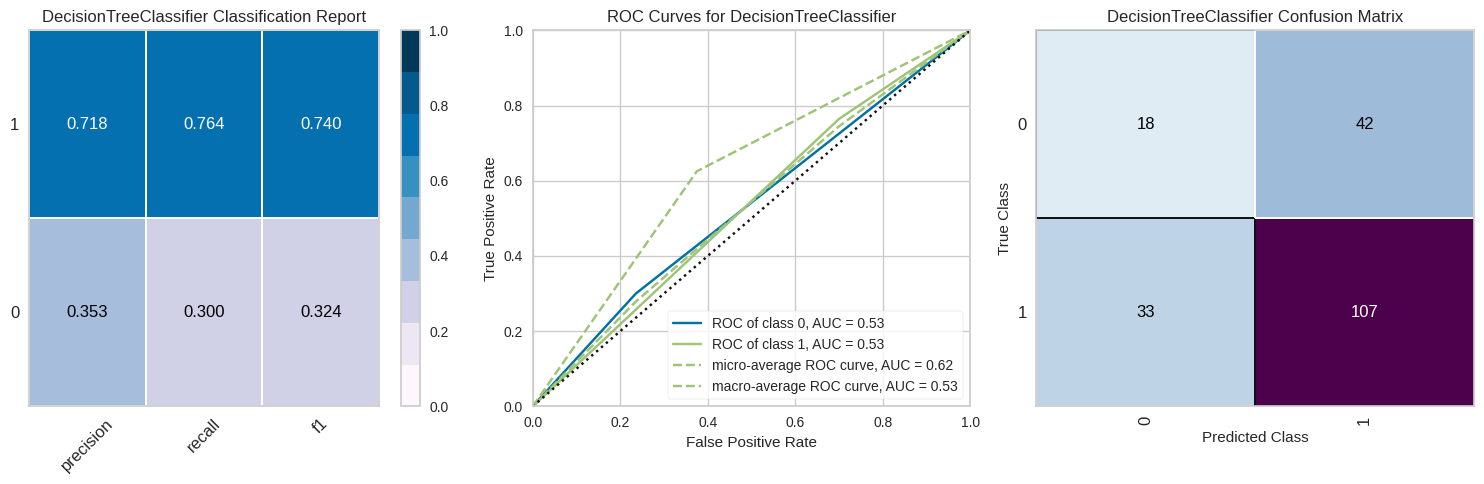

In [57]:
visualize(model_DT)

#11.7. Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

#Model Training
model_rfc = RandomForestClassifier()
model_rfc.fit(xtrain, ytrain);

#Prediction
y_pred_rfc = model_rfc.predict(xtest)
probabilities = model_rfc.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

Random Forest Classifier Evaluation Using Plotly.


In [59]:
evaluation(y_pred_rfc)


  Classification report : 
               precision    recall  f1-score   support

           0       0.58      0.25      0.35        60
           1       0.74      0.92      0.82       140

    accuracy                           0.72       200
   macro avg       0.66      0.59      0.59       200
weighted avg       0.69      0.72      0.68       200

Accuracy Score   :  0.72
Area under curve :  0.586


Random Forest Classifier Evaluation Using Yellow Brick


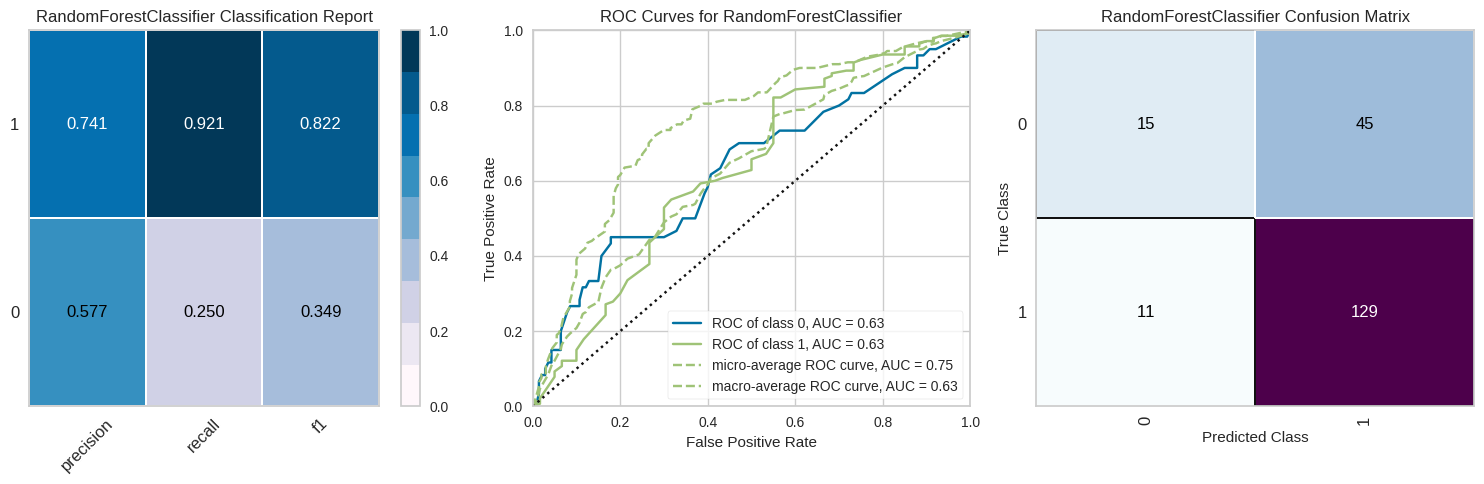

In [60]:
visualize(model_rfc)

#11.8. XGBoost

In [61]:
import xgboost as xgb

#Model Training
model_xgb  = xgb.XGBClassifier()
model_xgb.fit(xtrain, ytrain);

#Prediction
y_pred_xgb = model_xgb.predict(xtest)
probabilities = model_xgb.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

XGBoost Evaluation Using Plotly.

In [62]:
evaluation(y_pred_xgb)


  Classification report : 
               precision    recall  f1-score   support

           0       0.36      0.23      0.28        60
           1       0.71      0.82      0.76       140

    accuracy                           0.65       200
   macro avg       0.54      0.53      0.52       200
weighted avg       0.61      0.65      0.62       200

Accuracy Score   :  0.645
Area under curve :  0.527


XGBoost Evaluation Using YellowBrick

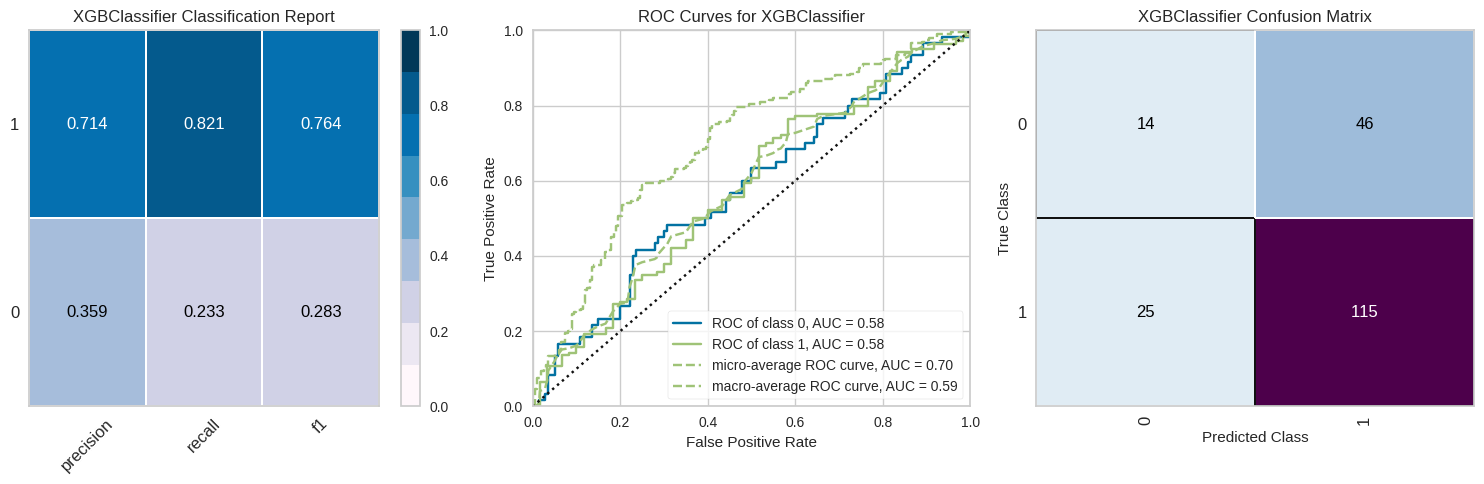

In [63]:
visualize(model_xgb)

#11.9 AdaBoost Classifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier

#Model Training
model_adaboost = AdaBoostClassifier()
model_adaboost.fit(xtrain, ytrain);

#Prediction
y_pred_ada = model_adaboost.predict(xtest)
probabilities = model_adaboost.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

AdaBoost Evaluation Using Plotly.

In [65]:
evaluation(y_pred_ada)


  Classification report : 
               precision    recall  f1-score   support

           0       0.42      0.18      0.26        60
           1       0.72      0.89      0.80       140

    accuracy                           0.68       200
   macro avg       0.57      0.54      0.53       200
weighted avg       0.63      0.68      0.63       200

Accuracy Score   :  0.68
Area under curve :  0.538


AdaBoost Evaluation Using Yellow Brick.

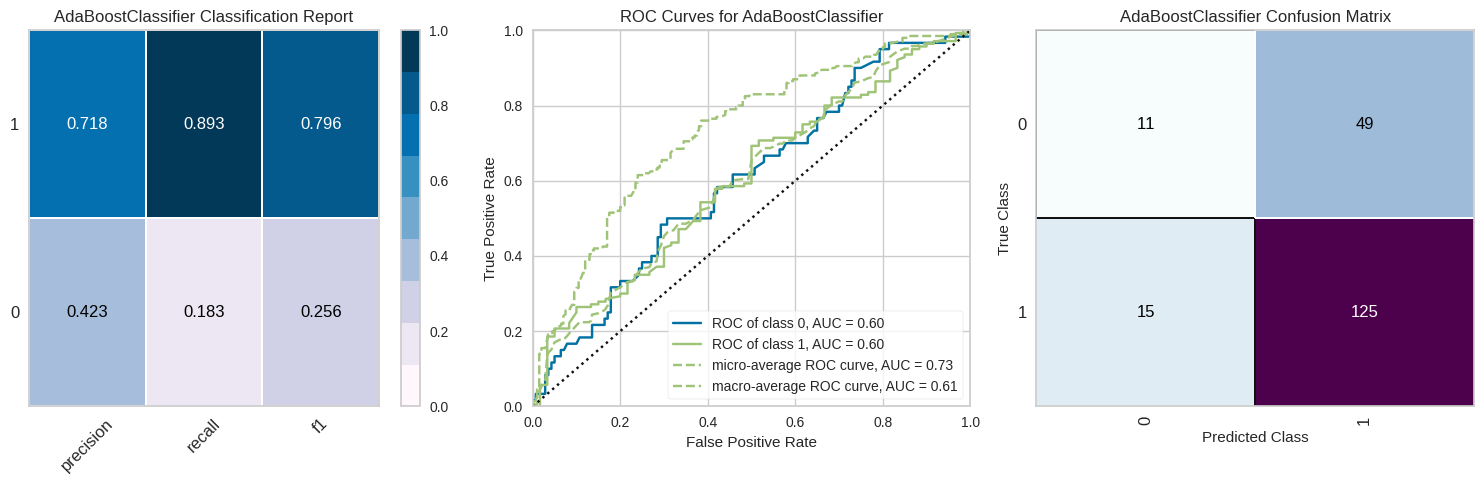

In [66]:
visualize(model_adaboost)

#13. Hyperparameter tunning

GridSearch methodology is used to find the best parameters for each model. Then, the models is trained on the best found hyperparamters.

In [67]:
from sklearn.model_selection import GridSearchCV
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import validation_curve

In [68]:
plt.style.use('fivethirtyeight')

# Validation Curve using Yellow Brick

def validation(model, meter, range1):
    i=0
    fig, axes = plt.subplots(2, 2,figsize=(15,10))
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    
    cv = StratifiedKFold(n_splits=5) #To avoid class imbalance problem, using Stratified cross validation

    visualgrid = [
                ValidationCurve(model, param_name=meter,param_range = range1, cv=cv, scoring="accuracy",ax=axes[0][0]),
                
                ValidationCurve(model, param_name= meter, param_range= range1, cv=cv, scoring="precision",ax=axes[0][1]),
             
                ValidationCurve(model, param_name= meter, param_range= range1, cv=cv, scoring="recall",ax=axes[1][0]),
                
                ValidationCurve(model, param_name= meter, param_range= range1, cv=cv, scoring="f1",ax=axes[1][1])    ]
    
    score=['Accuracy','Precision','Recall','f1']
    
    print('The plots scores are in following order\n:')
    
    for viz in visualgrid:
        print('\n',i+1,'.',score[i])
        i+=1
        viz.fit(X, y)
        viz.finalize()
            
    plt.show()


# Learning Curve using Yellow Brick

def learning (model):
    
    i=0
    fig, axes = plt.subplots(2, 2,figsize=(15,10))
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    
    cv = StratifiedKFold(n_splits=5) #To avoid class imbalance problem, using Stratified cross validation
    sizes = np.linspace(0.3, 1.0, 10)

    visualgrid = [
                LearningCurve(model, cv=cv, scoring="accuracy",train_sizes=sizes,ax=axes[0][0]),
                
                LearningCurve(model, cv=cv, scoring="precision",train_sizes=sizes,ax=axes[0][1]),
             
                LearningCurve(model, cv=cv, scoring="recall",train_sizes=sizes,ax=axes[1][0]),
                
                LearningCurve(model, cv=cv, scoring="f1",train_sizes=sizes,ax=axes[1][1])    ]
    
    score=['Accuracy','Precision','Recall','f1']
    
    print('The plots scores are in following order\n:')
    
    for viz in visualgrid:
        print('\n',i+1,'.',score[i])
        i+=1
        viz.fit(X, y)
        viz.finalize()
            
    plt.show()

In [69]:
plt.style.use('fivethirtyeight')
# Validation curve using scikit learn

def validation_plots(name,algorithm, feature, range3):
    
    param_range = range3
    

    cv = StratifiedKFold(n_splits=5) #To avoid class imbalance problem, using Stratified cross validation

    train_scores, test_scores = validation_curve(algorithm, X, y, feature, param_range=param_range, cv=cv)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with"+name)
    plt.xlabel(feature)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    
    
    #scaling on x axis and plotting the mean score
    plt.plot(param_range, train_scores_mean, label="Training score", color="green", lw=2, linestyle='dashdot')
        
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=2, linestyle='dashdot')
        
    plt.legend(loc="best")
    
    plt.show()

##12.1. Logistic Regression

In [70]:
LG= LogisticRegression(penalty='l2')
hyperparameters = {'dual':[True,False],'max_iter':[100,110,120,130,140],'C':[0.001,1.0,1.5,2.0,2.5,100]}
LG_classifier =  GridSearchCV(LG, hyperparameters, refit=True, cv=5)
LG_classifier.fit(xtrain,ytrain)

print("The best model has the following hyperparameters:" ,LG_classifier.best_params_)

The best model has the following hyperparameters: {'C': 100, 'dual': False, 'max_iter': 100}


In [71]:
# Display Metric
y_pred_LG2 = LG_classifier.predict(xtest)
print("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_LG2))
print("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_LG2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.55      0.18      0.27        60
           1       0.73      0.94      0.82       140

    accuracy                           0.71       200
   macro avg       0.64      0.56      0.55       200
weighted avg       0.67      0.71      0.66       200

Accuracy Score   :  0.71


Validation Curves for HyperParameter C (Using YellowBrick)

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


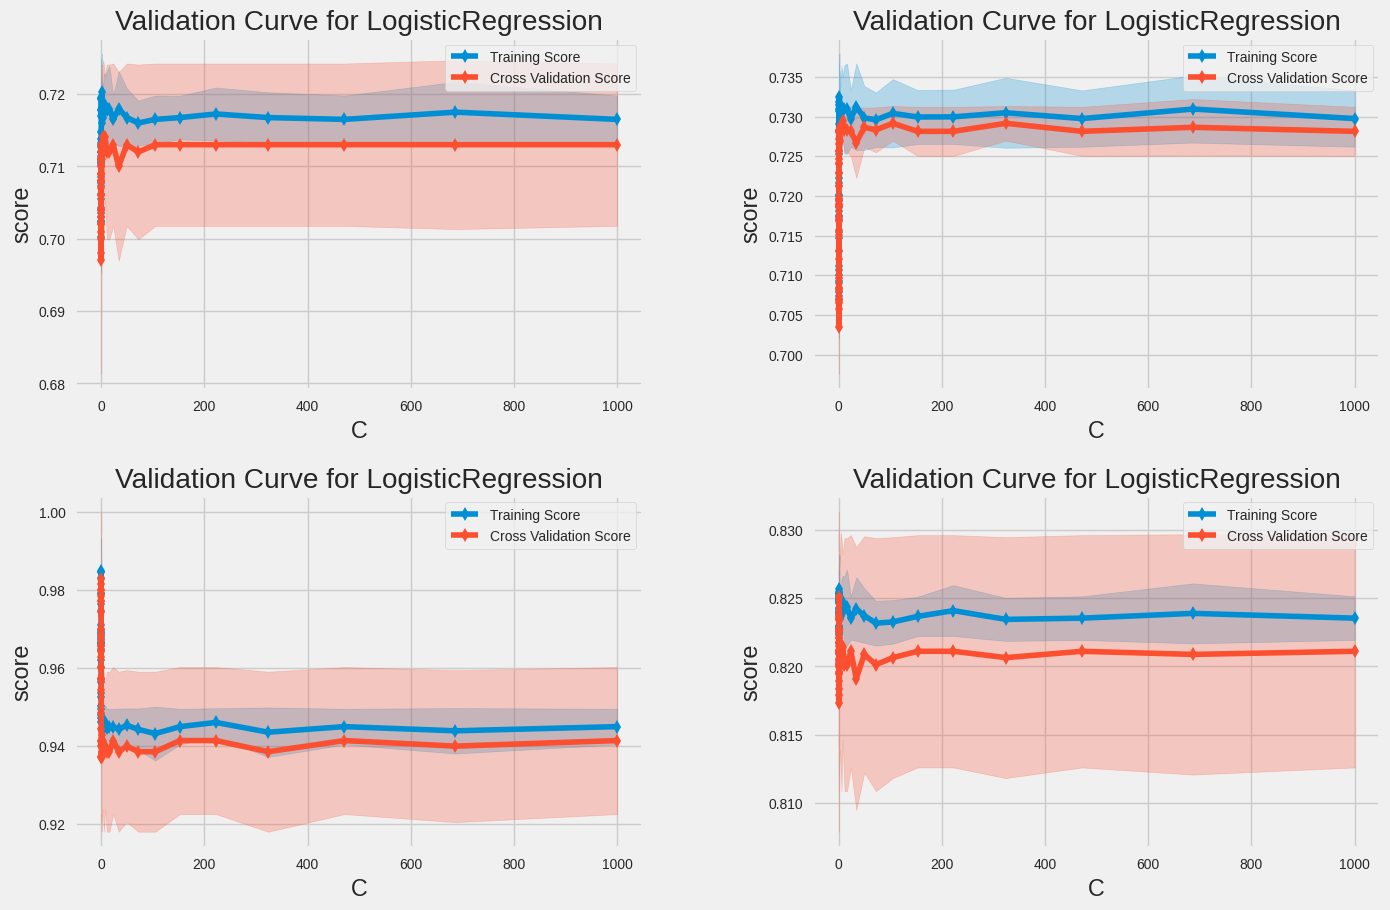

In [72]:
validation(LogisticRegression(penalty='l2'),'C',np.logspace(-5, 3))

Learning Curves for Logistic Regression (Using YellowBricks)

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


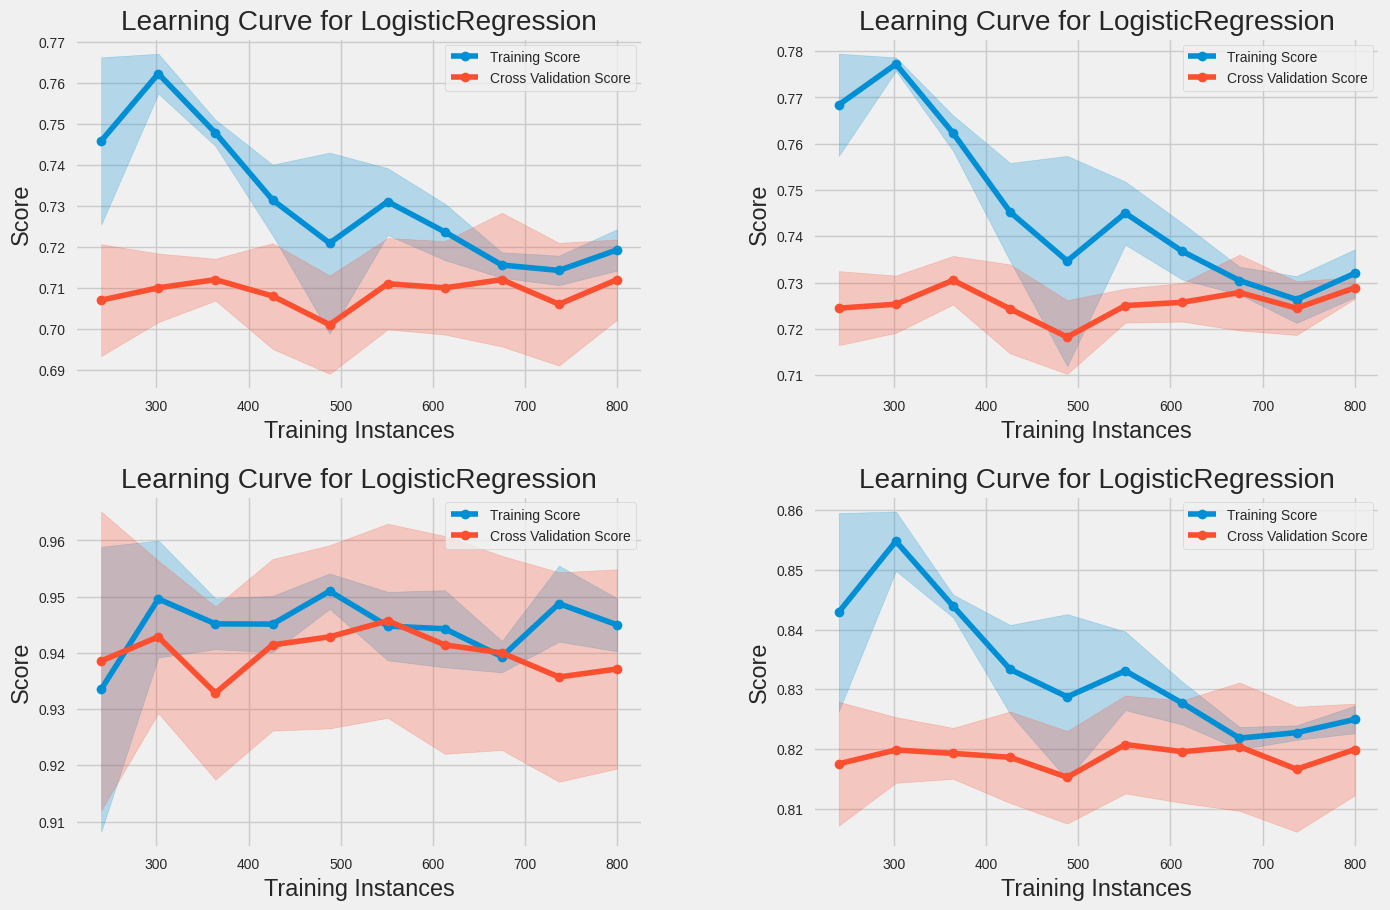

In [73]:
learning(LogisticRegression(penalty='l2'))

All the previous plots show that the training and validation score converge with increasing instances. On other words, the models performace will be better as more data is provided to the model.

##12.2. KNN Classifer

In [74]:
knn = KNeighborsClassifier()
hyperparameters = {'n_neighbors' : list(range(1,40)), 'p':[1,2]}
knn_classifier =  GridSearchCV(knn, hyperparameters, refit=True, cv=5)
knn_classifier.fit(xtrain,ytrain)
print("The best fit value is found out to be :" ,knn_classifier.best_params_)

The best fit value is found out to be : {'n_neighbors': 31, 'p': 1}


In [75]:
y_pred_knn2 = knn_classifier.predict(xtest)

In [76]:
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_knn2))
print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_knn2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.50      0.08      0.14        60
           1       0.71      0.96      0.82       140

    accuracy                           0.70       200
   macro avg       0.61      0.52      0.48       200
weighted avg       0.65      0.70      0.62       200

Accuracy Score   :  0.7


Validation Curve for Hyperparameter n_neighbors(Using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


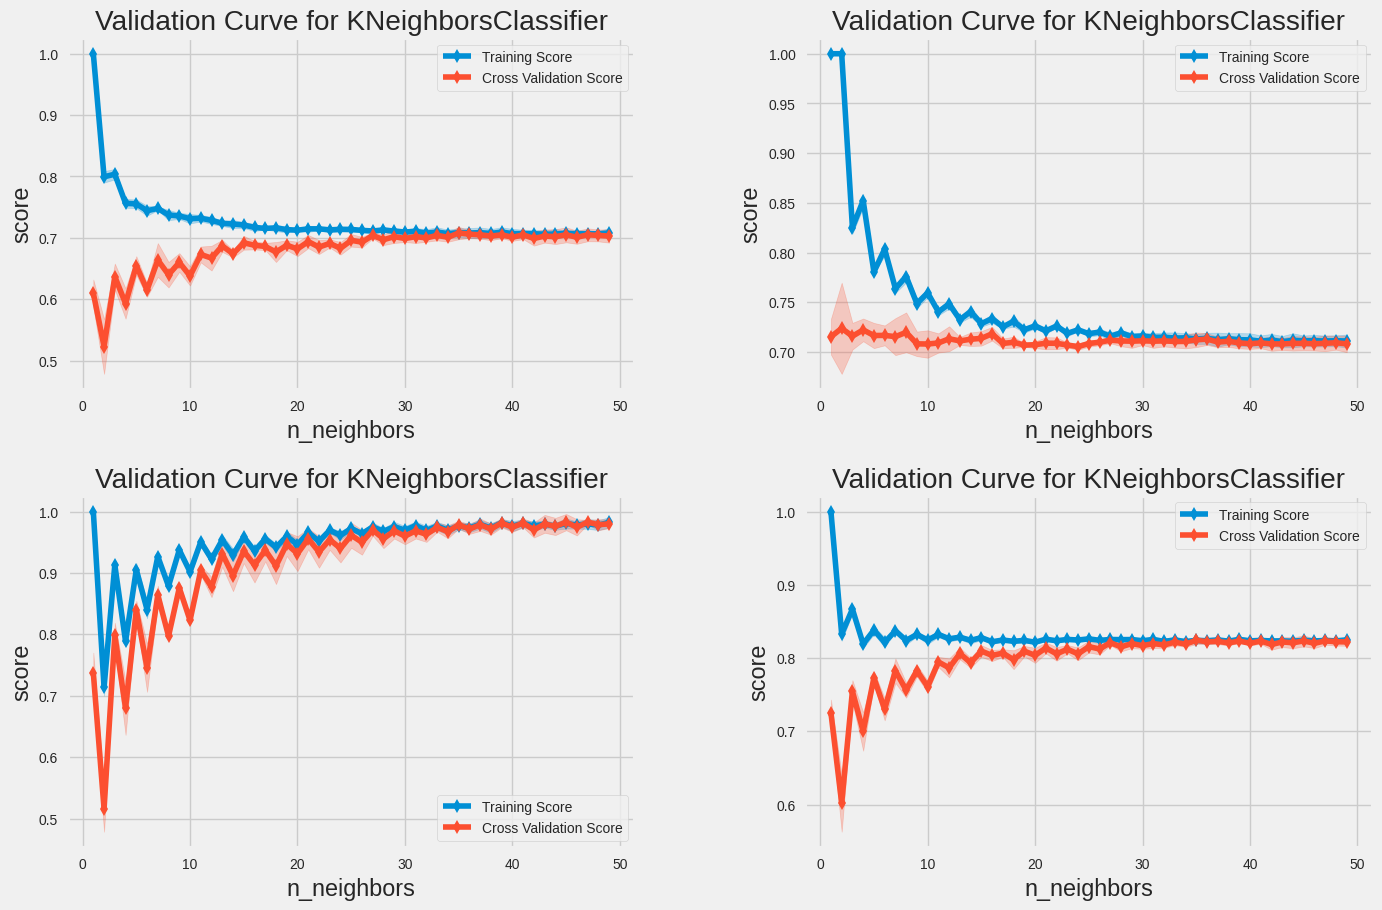

In [77]:
validation(KNeighborsClassifier(),'n_neighbors',np.arange(1, 50))

The plots indicate that the models performance enhances by increasing the number of neighbors (better generalization).

Learning Curves for KNN (Using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


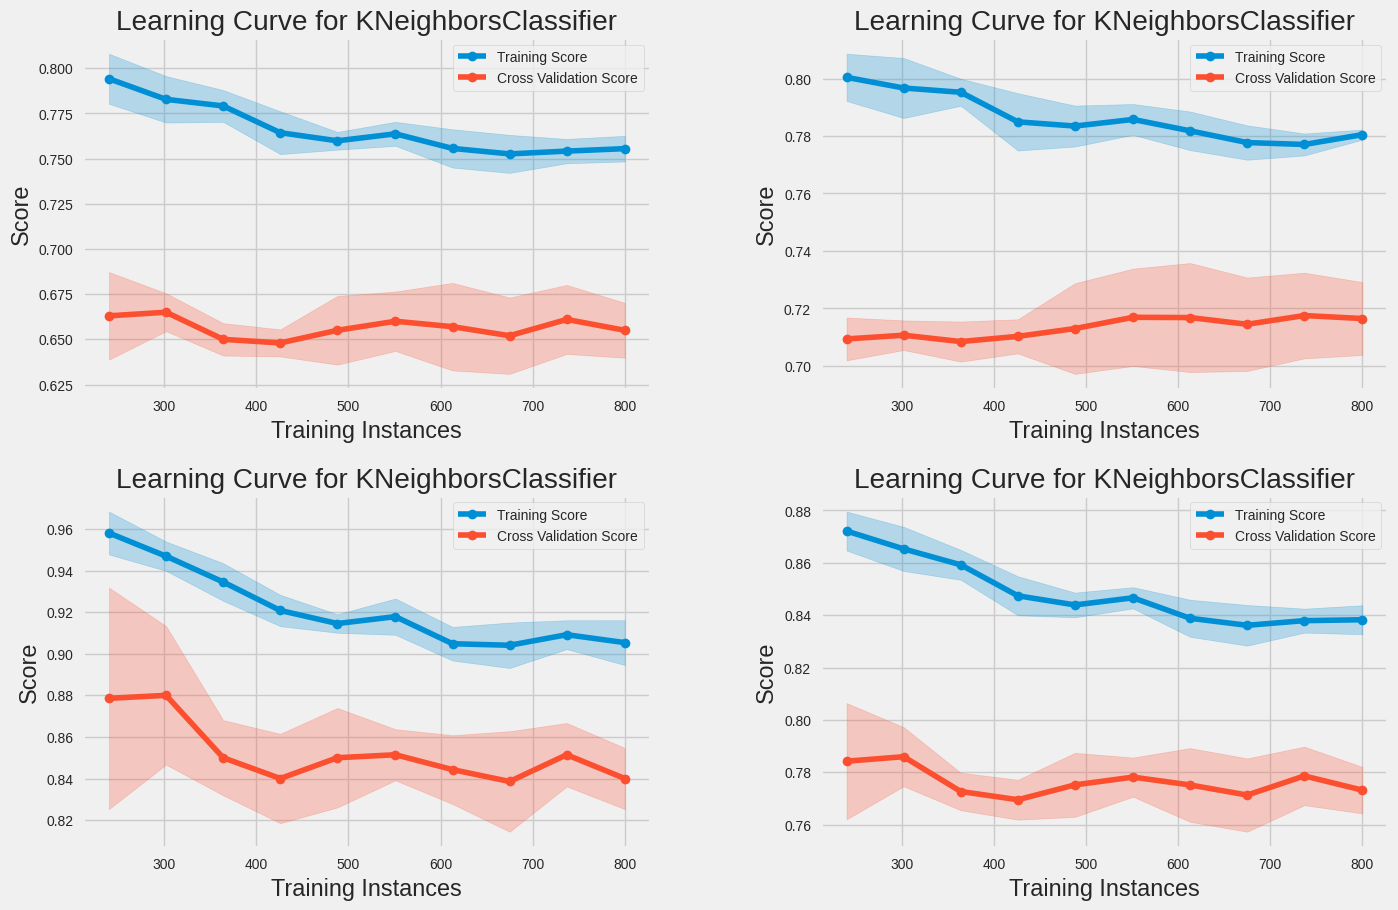

In [78]:
learning(KNeighborsClassifier())

The plots indicate that the model performance remains approximately constant by increasing the training instances.

#12.3 Decision Tree

In [79]:
DT = tree.DecisionTreeClassifier()
hyperparameters = {'criterion' :['gini','entropy'], 'max_features':[2,4,6,8],'max_depth':[0.001,1,10, 20, 25, 30, 40, 50]},
DT_classifier =  GridSearchCV(DT, hyperparameters, refit=True, cv=5)
DT_classifier.fit(xtrain,ytrain)

print("The best hyperparameter values are:" ,DT_classifier.best_params_)

The best hyperparameter values are: {'criterion': 'gini', 'max_depth': 1, 'max_features': 8}


In [80]:
y_pred_DT2 = DT_classifier.predict(xtest)

In [81]:
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_DT2))
print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_DT2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.70      1.00      0.82       140

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200

Accuracy Score   :  0.7


 Learning Curve for Decision Tree(Using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


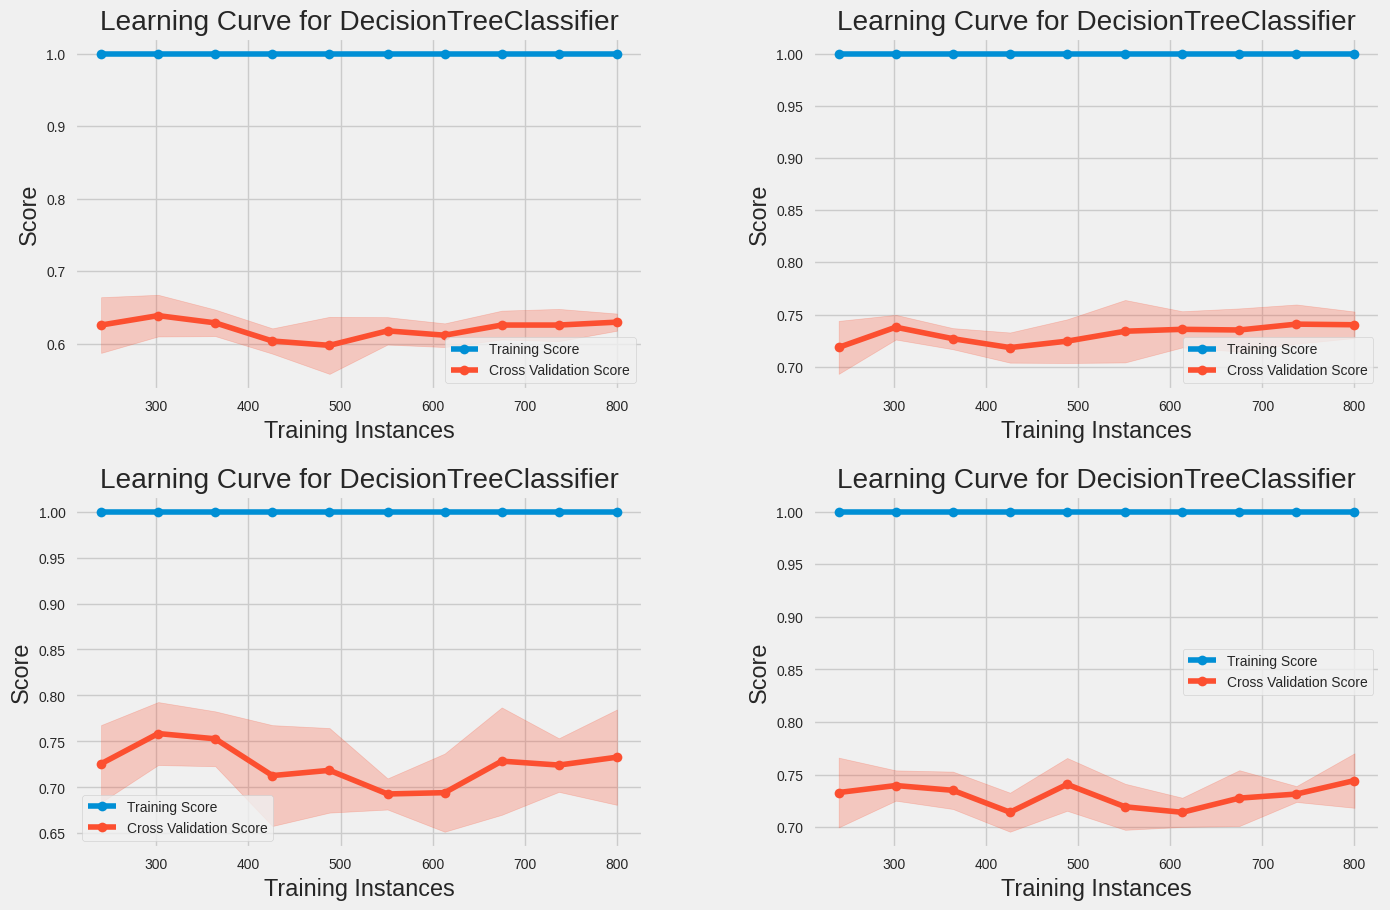

In [82]:
learning(DT)

No significant positive effect is observed in model performance by increasing the data training instances.

#12.4 Naive Bayes

In [83]:
NB = GaussianNB()
hyperparameters = {'var_smoothing':np.logspace(0,-9, num=100)}

NB_classifier =  GridSearchCV(NB, hyperparameters, refit=True, cv=5)
NB_classifier.fit(xtrain,ytrain);
print("The best fit value is found out to be :" ,NB_classifier.best_params_)

The best fit value is found out to be : {'var_smoothing': 1.519911082952933e-07}


In [84]:
y_pred_NB2 = NB_classifier.predict(xtest)
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_NB2))
print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_NB2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.43      0.25      0.32        60
           1       0.73      0.86      0.79       140

    accuracy                           0.68       200
   macro avg       0.58      0.55      0.55       200
weighted avg       0.64      0.68      0.65       200

Accuracy Score   :  0.675


Validation Curve for HyperParameter var_smoothing(Using YellowBrick):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


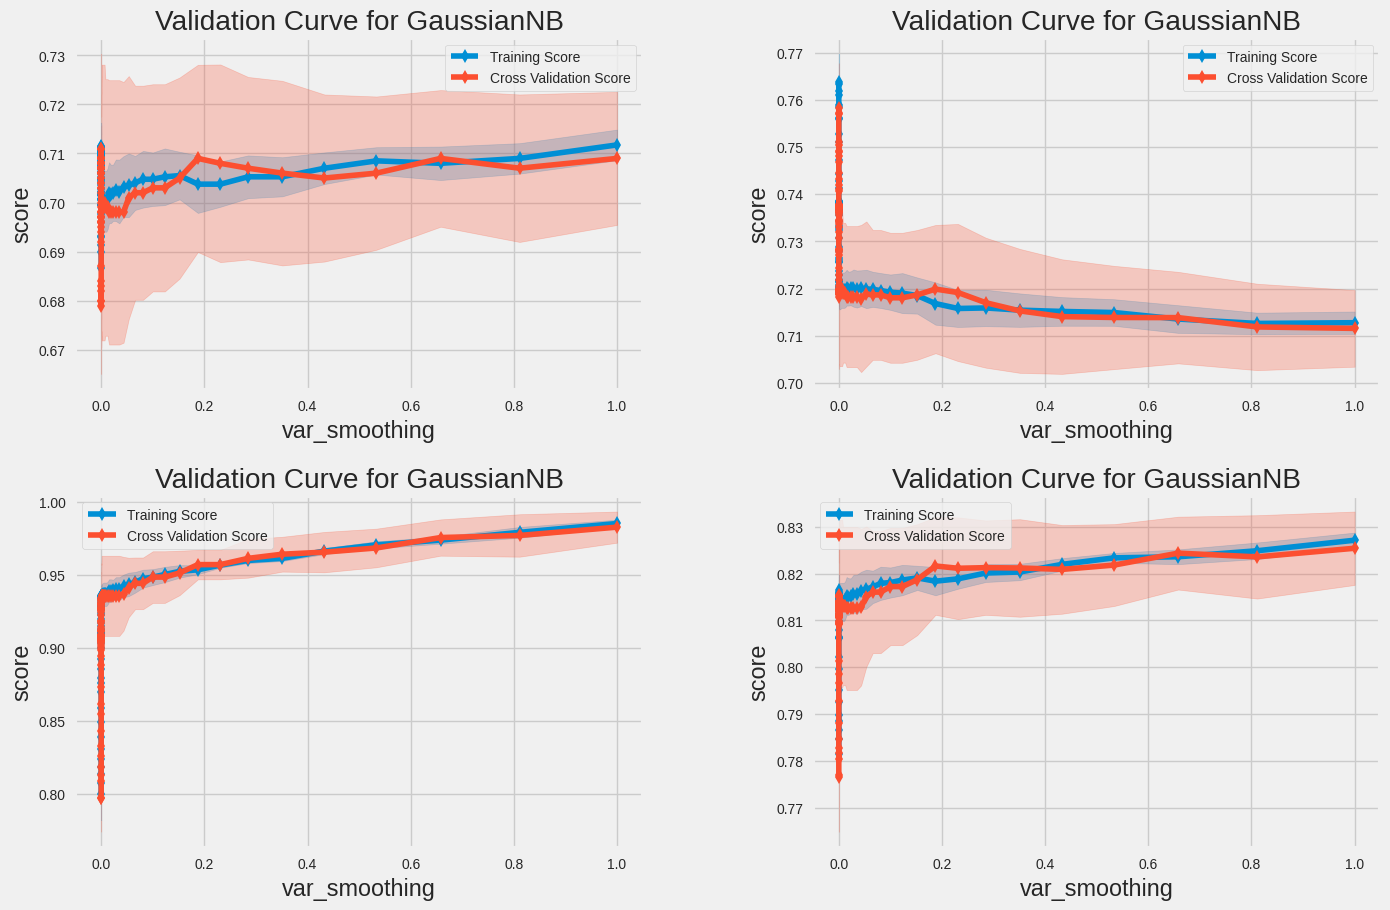

In [85]:
validation(GaussianNB(),'var_smoothing',np.logspace(0,-9, num=100))

The best performance metrics are obtained for a very small value of var_smoothing. For higher values, their effect on performance metrics is attenuated.

Learning Curves for Gaussian Naive Bayes (Using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


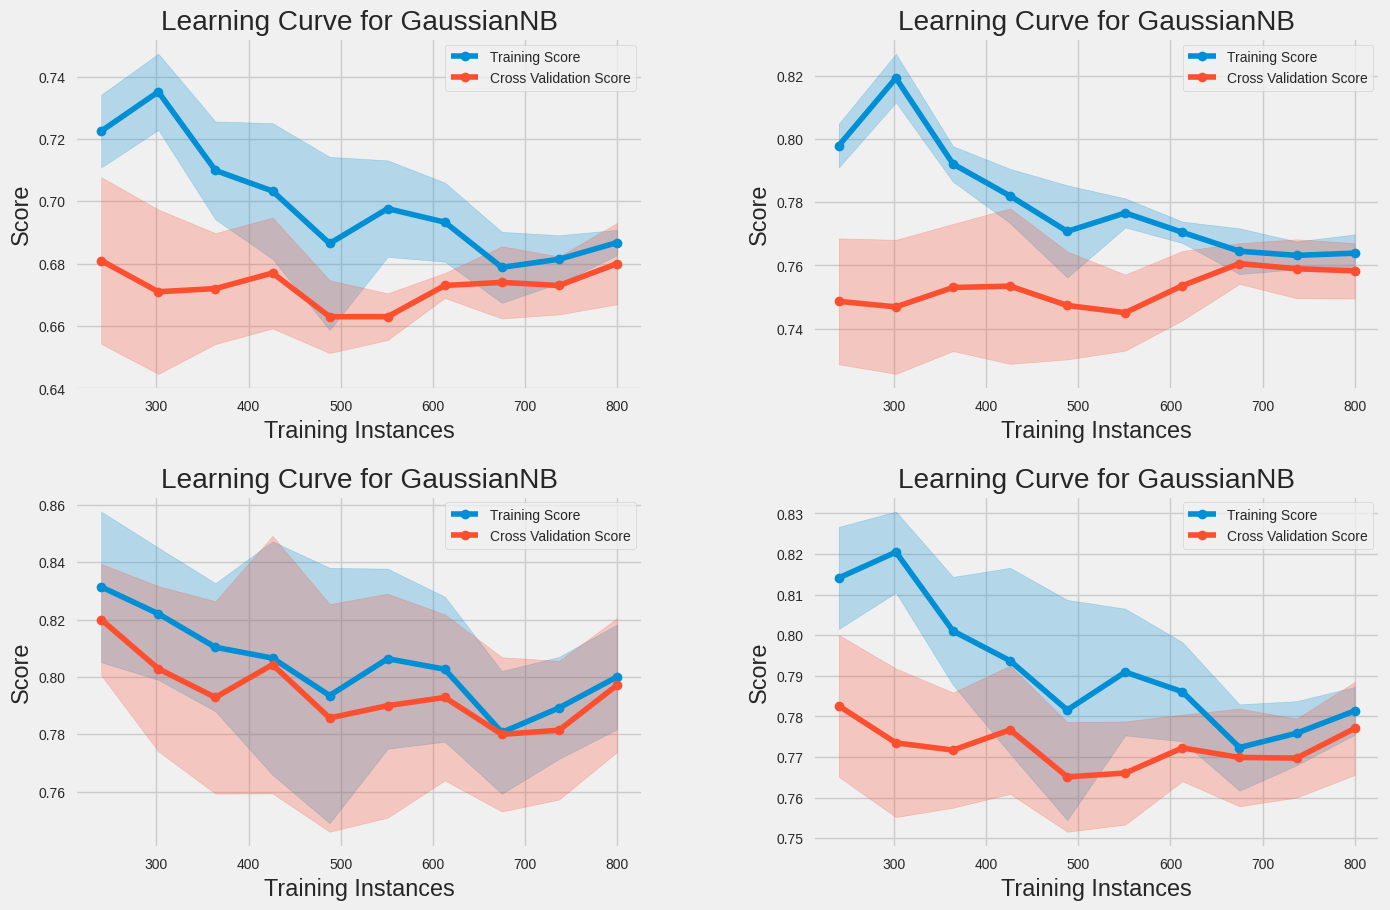

In [86]:
learning(GaussianNB())

Yhe model generalization capacity increases when more data is provided (training and validation scores converge with increasing data)

#12.5. Random Forest

In [87]:
RF= RandomForestClassifier()
hyperparameters = {'n_estimators' :[1,2,5,10,15,25,30], 'max_features':[2,4,6,8],'max_depth':[0.01,1,10, 20, 25,30, 40, 50]}
RF_classifier =  GridSearchCV(RF, hyperparameters, refit=True, cv=5)
RF_classifier.fit(xtrain,ytrain);
print("The best fit value is found out to be :" ,RF_classifier.best_params_)

The best fit value is found out to be : {'max_depth': 10, 'max_features': 2, 'n_estimators': 30}


In [88]:
y_pred_rfc2 = RF_classifier.predict(xtest)
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_rfc2))
print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_rfc2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.56      0.23      0.33        60
           1       0.74      0.92      0.82       140

    accuracy                           0.71       200
   macro avg       0.65      0.58      0.57       200
weighted avg       0.68      0.71      0.67       200

Accuracy Score   :  0.715


Learning Curves for Random Forest (Using YellowBrick):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


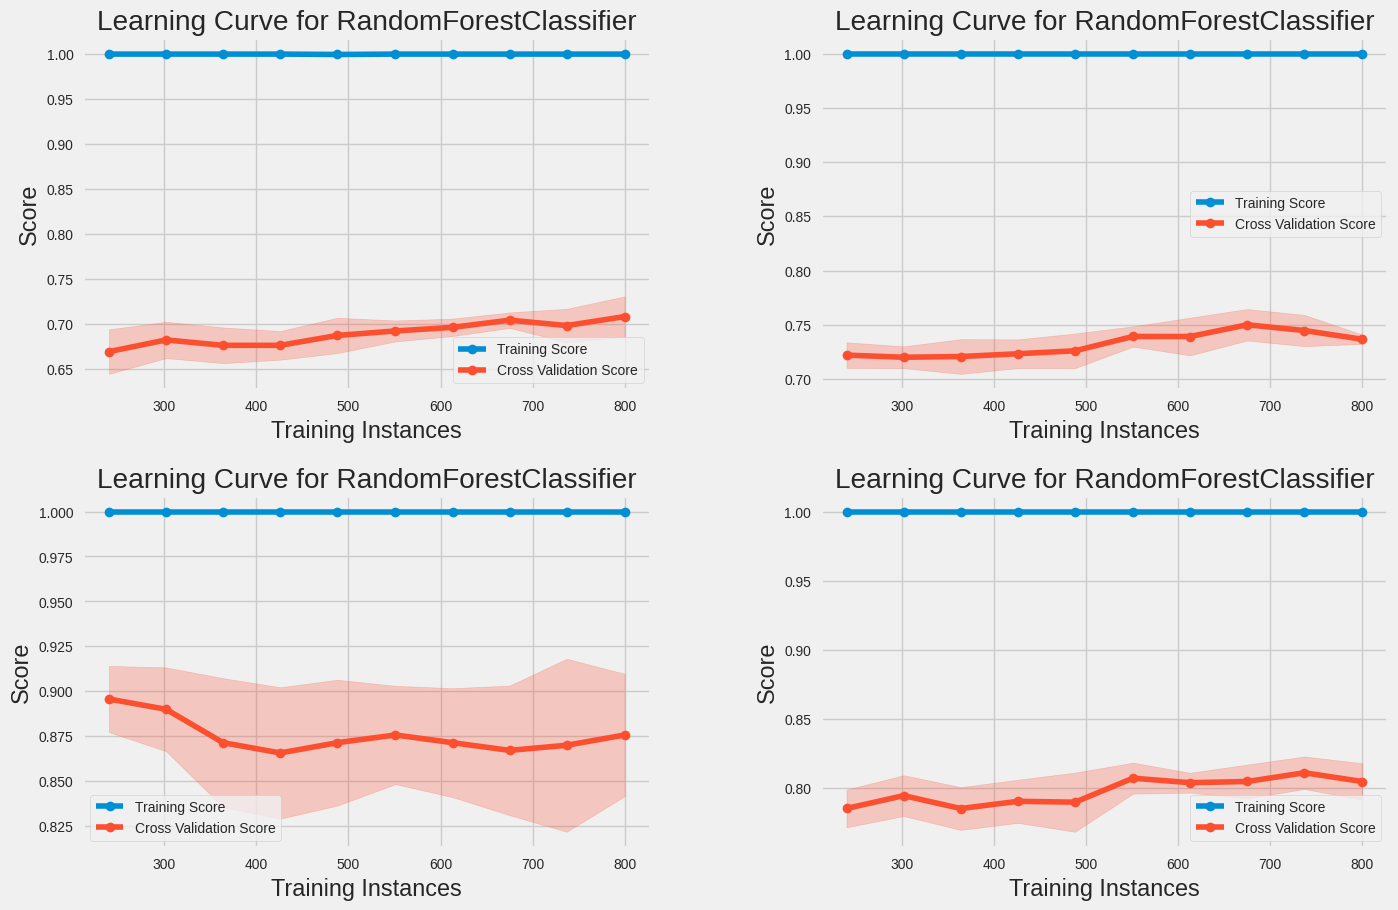

In [89]:
learning(RandomForestClassifier())

No positive impact on model performance is observed with an increase in the number of instances.

#12.6 XGBoost

In [90]:
XGB= xgb.XGBClassifier()
hyperparameters = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],"max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15], 
                    "gamma":[ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}
                   
XGB_classifier =  GridSearchCV(XGB, hyperparameters, refit=True, cv=5)
XGB_classifier.fit(xtrain,ytrain)
print("The best fit value is found out to be :" ,XGB_classifier.best_params_)

The best fit value is found out to be : {'gamma': 0.1, 'learning_rate': 0.25, 'max_depth': 4}


In [91]:
y_pred_xgb2 = RF_classifier.predict(xtest)
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_xgb2))
print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_xgb2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.56      0.23      0.33        60
           1       0.74      0.92      0.82       140

    accuracy                           0.71       200
   macro avg       0.65      0.58      0.57       200
weighted avg       0.68      0.71      0.67       200

Accuracy Score   :  0.715


Validation Curves for HyperParamter Learning Rate (Using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


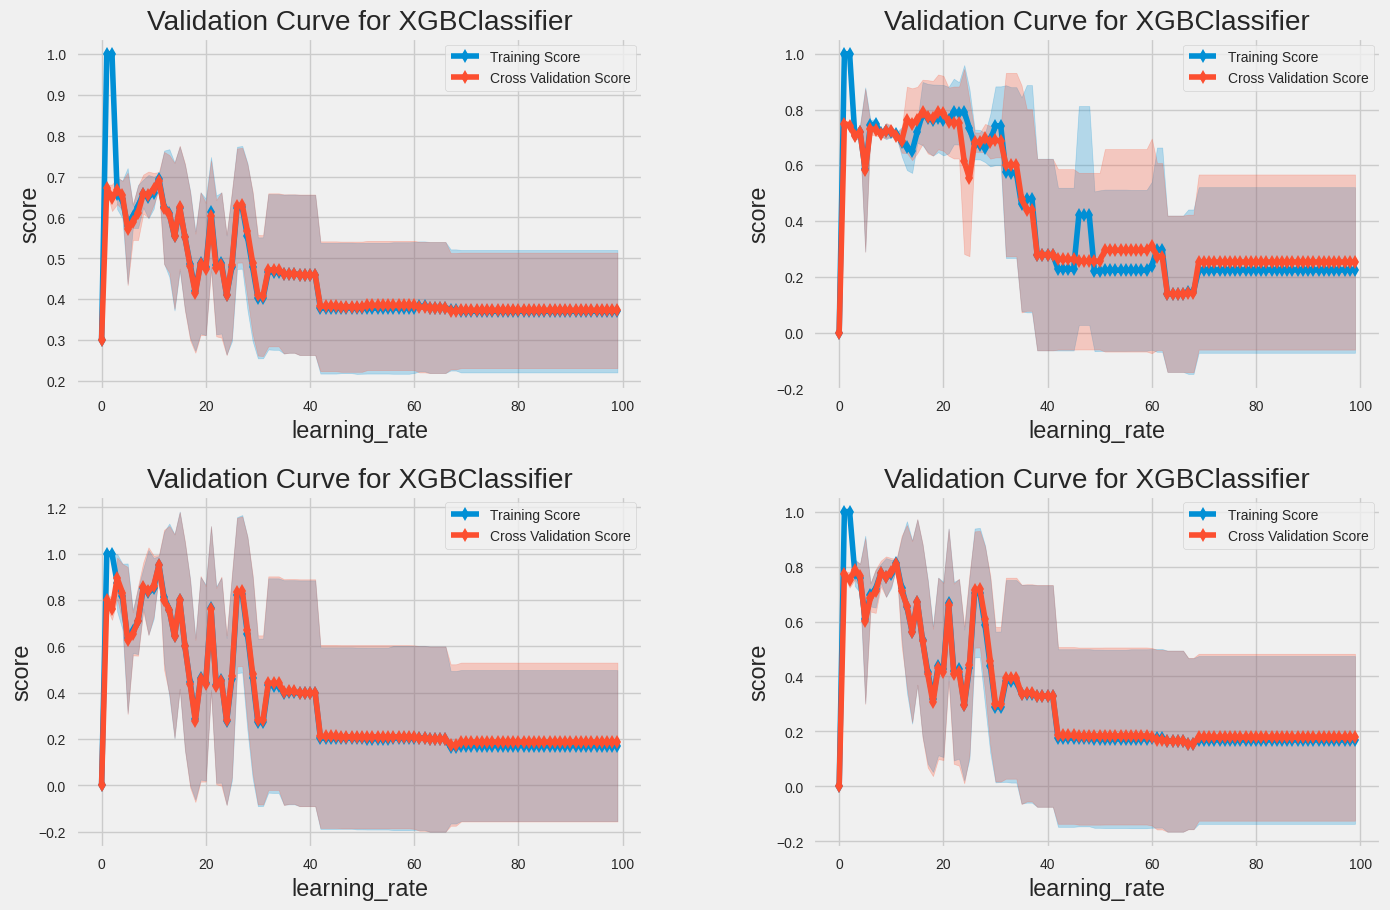

In [92]:
validation(xgb.XGBClassifier(),'learning_rate',np.arange(0,100))

The validation curves show that the model generalizes well on a wide range of learning rate values. The performance stabilizes for a learning rate of around 50.

Learning Curves for XGBoost (Using yellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


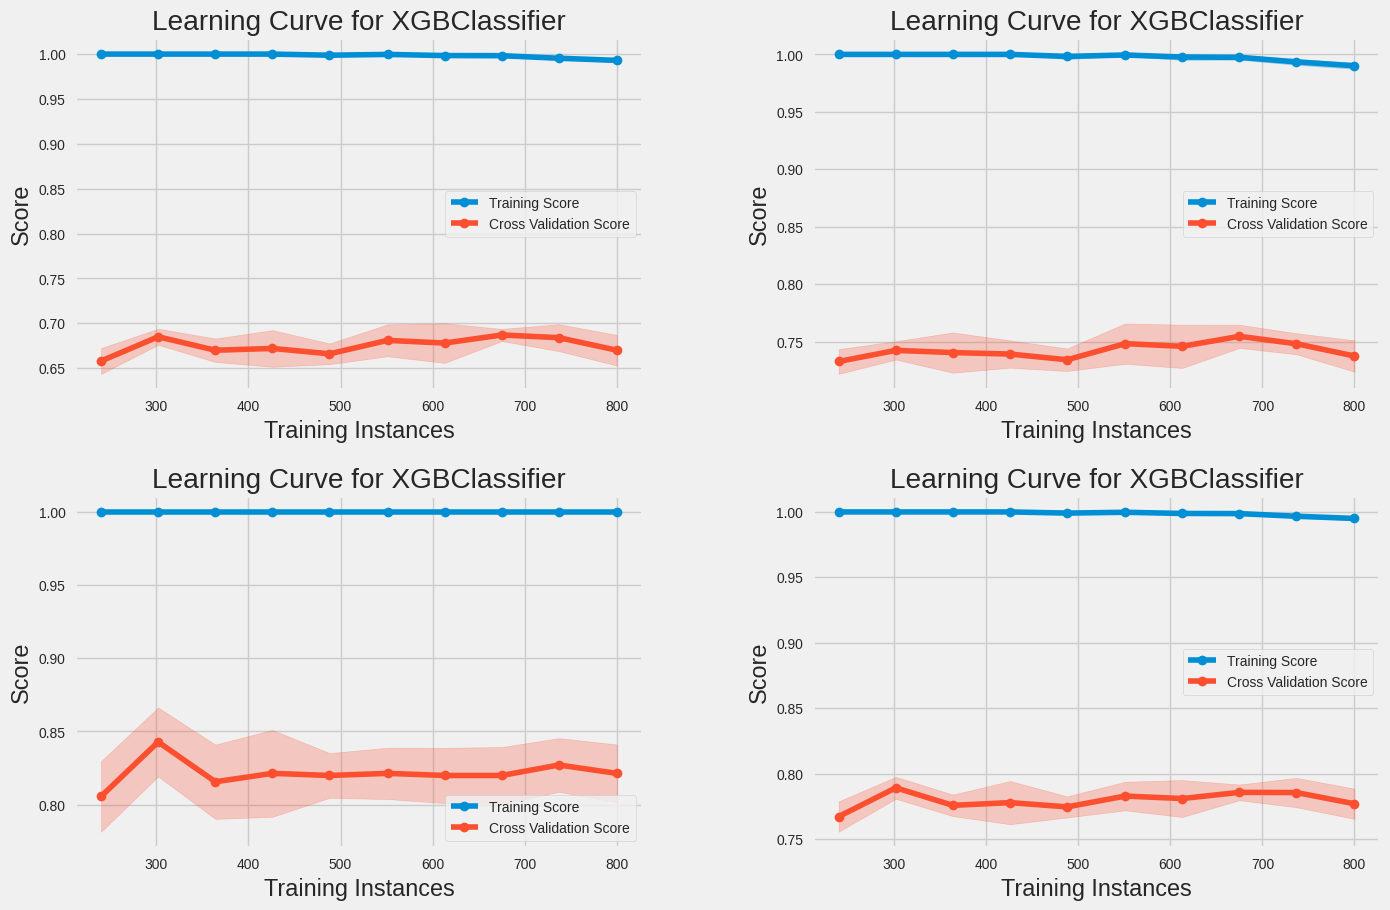

In [93]:
learning(xgb.XGBClassifier())

The Learning curves indicate that there will no positive impact on models performance with increasing data (training instances).

#12.7 AdaBoost 

In [94]:
ADA = AdaBoostClassifier()
hyperparameters = {"learning_rate": [0.0001,0.05, 0.10, 0.15, 0.20, 0.25,0.26,0.27, 0.30 ]}

ADA_classifier =  GridSearchCV(ADA, hyperparameters, refit=True, cv=5)
ADA_classifier.fit(xtrain,ytrain)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.0001, 0.05, 0.1, 0.15, 0.2, 0.25,
                                           0.26, 0.27, 0.3]})

In [95]:
print("The best fit value is found out to be :" ,ADA_classifier.best_params_)
y_pred_ada2 = ADA_classifier.predict(xtest)

The best fit value is found out to be : {'learning_rate': 0.3}


In [96]:
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_ada2))
print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_ada2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.38      0.08      0.14        60
           1       0.71      0.94      0.81       140

    accuracy                           0.69       200
   macro avg       0.55      0.51      0.47       200
weighted avg       0.61      0.69      0.61       200

Accuracy Score   :  0.685


Validation Curve for Hyperparameter Learning Rate (using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


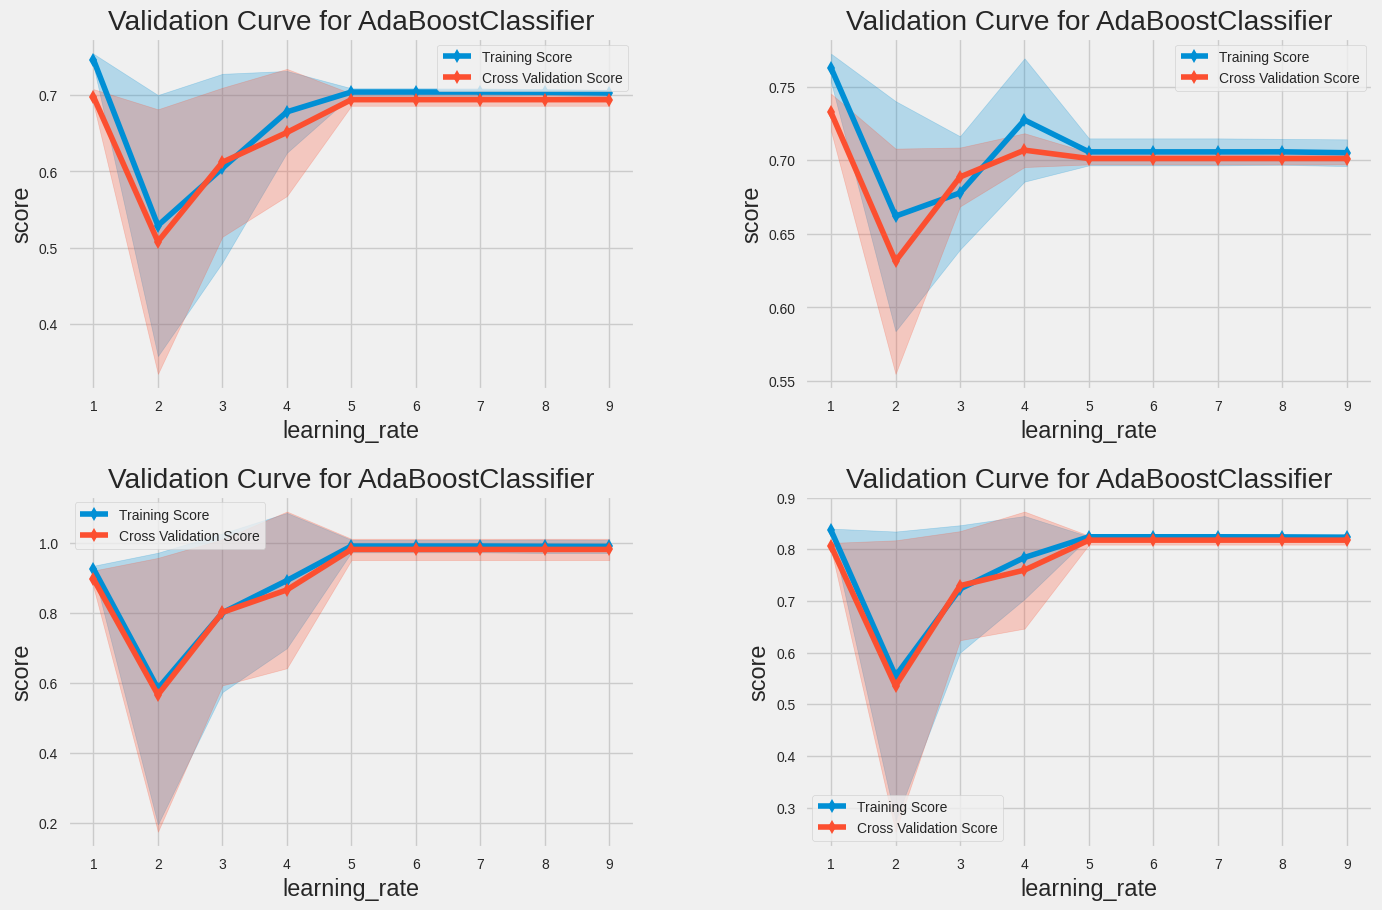

In [97]:
validation(AdaBoostClassifier(),'learning_rate',np.arange(1,10))

The plots indicate that the model generalizes over a broad range of learning rates. The metric scores increase for a higher Learning Rate > 2. After the Learning rate = 5, the scores stabilize.

Learning Curves for AdaBoost (Using yellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


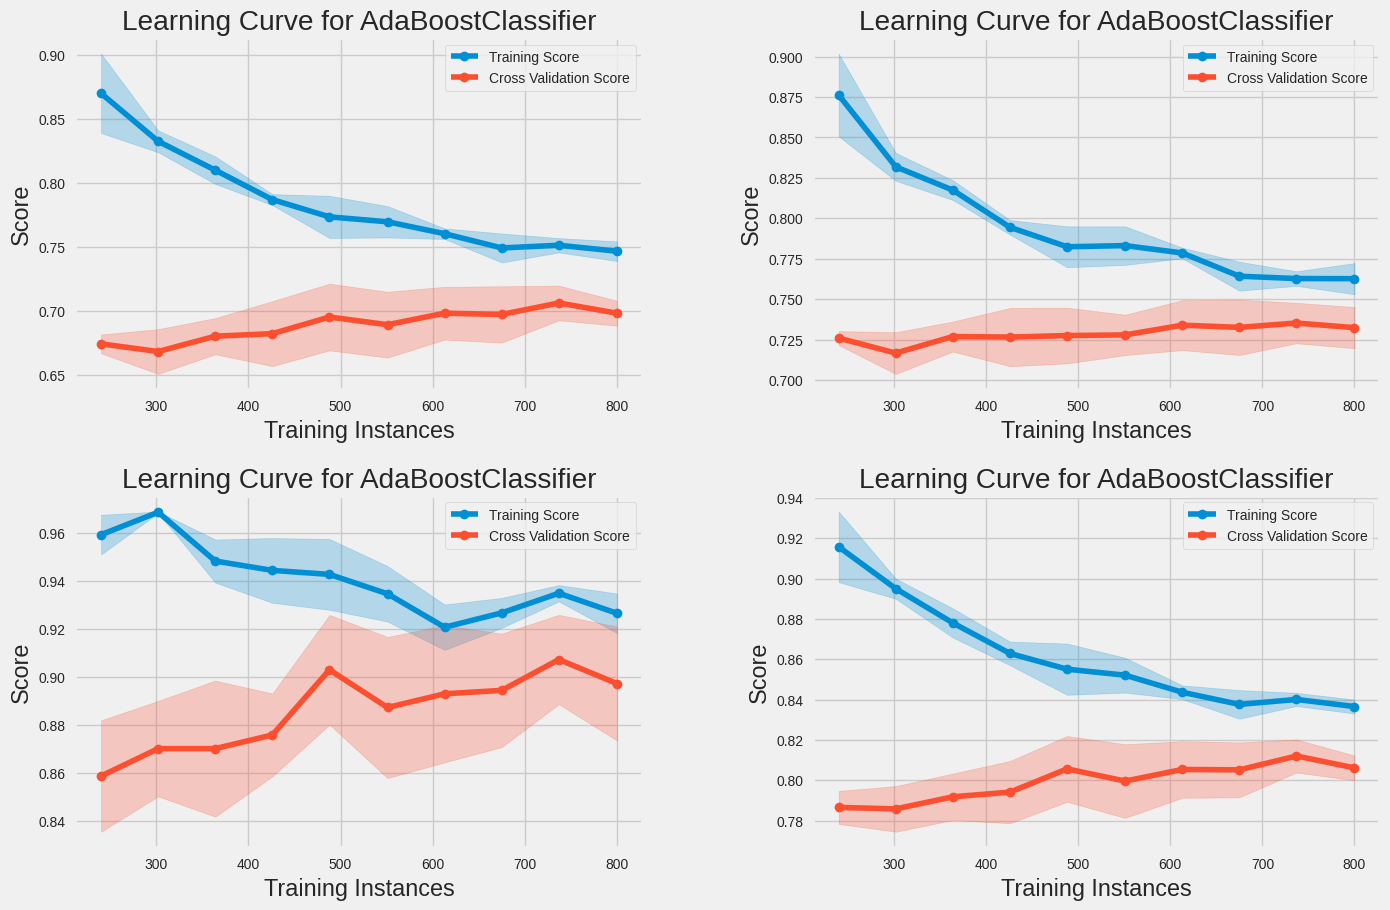

In [98]:
learning(AdaBoostClassifier())

The learning curves show that training and validation score converge with increase in data and therfore the model will generalize better with incresing number of instances.

#13. Model Metrics After Hyper Parameter Tunning

In [99]:
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    roc_auc      = roc_auc_score(testing_y,predictions)
    
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "roc_auc"         : [roc_auc]
                       
                      })
    return df

model1 = model_report(LG_classifier,xtrain,xtest,ytrain,ytest,
                      "Logistic Reg.")


model2 = model_report(RF_classifier,xtrain,xtest,ytrain,ytest,
                     "Random Forest Classifier")


model3 = model_report(XGB_classifier,xtrain,xtest,ytrain,ytest,
                     "XGBoost.")

model4 = model_report(knn_classifier,xtrain,xtest,ytrain,ytest,
                      "KNN Classifier")

model5 = model_report(NB_classifier,xtrain,xtest,ytrain,ytest,
                      "Naive Bayes")

model6 = model_report(DT_classifier,xtrain,xtest,ytrain,ytest,
                      "Decision Tree")

model7 = model_report(ADA_classifier,xtrain,xtest,ytrain,ytest,
                      "AdaBoost")

    
model_performances = pd.concat([model1,model4,model6,model5,model2, model3,model7],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

In [100]:
model_performances

Model  Accuracy_score  Recall_score  Precision  \
0             Logistic Reg.           0.710      0.935714   0.727778   
1            KNN Classifier           0.700      0.964286   0.710526   
2             Decision Tree           0.700      1.000000   0.700000   
3               Naive Bayes           0.675      0.857143   0.727273   
4  Random Forest Classifier           0.715      0.942857   0.729282   
5                  XGBoost.           0.690      0.835714   0.750000   
6                  AdaBoost           0.685      0.942857   0.705882   

   f1_score   roc_auc  
0  0.818750  0.559524  
1  0.818182  0.523810  
2  0.823529  0.500000  
3  0.786885  0.553571  
4  0.822430  0.563095  
5  0.790541  0.592857  
6  0.807339  0.513095

#14. Conclusion

Logistic Regression exhibits the best performance metrics. It has the highest accuracy (0.71). Precision, recall and and roc_auc is also comparable with other algorithms. 

Credits:
1. [WAQAS ALI NAQVI](https://www.kaggle.com/code/waqasalinaqvi/german-credit-eda-crossvalidation-ml-algorithms)
2. [JANIO MARTINEZ BACHMANN](https://www.kaggle.com/code/janiobachmann/german-credit-analysis-a-risk-perspective)